# Impact of Feature Scaling in Machine Learning Algorithms

This document serves as the Supplementary Material for the article Impact of Feature Scaling in Machine Learning Algorithms. Because the final results comprise over 50 tables, we have consolidated them here for clarity and ease of reference. You will find the complete outcomes for each dataset—detailing the scaling methods applied, the machine learning algorithms evaluated, performance metrics, and both training and inference times. All analyses were performed using Python, and the raw CSV files are available in the repository for convenient spreadsheet–based review.

## Loading the data and libraries

In [32]:
import pandas as pd
import dataframe_image as dfi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import re

df_results = pd.read_csv('results_final.csv')
df_results['scaling_name'] = df_results['scaling_name'].fillna('None')

In [33]:
import re
def format_dataset_name(name):
    # Remove suffix like "_dataset"
    name = re.sub(r'_dataset$', '', name)
    # Replace underscores with spaces
    name = name.replace('_', ' ')
    # Capitalize each word
    return name.title()
dataset_names = df_results['dataset_name'].unique()
formatted_names = [format_dataset_name(name) for name in dataset_names]
dataset_names = df_results['dataset_name'].unique()
formatted_names = [format_dataset_name(name) for name in dataset_names]
name_mapping = dict(zip(dataset_names, formatted_names))

Here’s a clear mapping of scaling abbreviations to their full names, optimized for plots/tables:

In [34]:
scaling_abbrev = {
    'MinMaxScaler': 'MM',
    'MaxAbsScaler': 'MA',
    'StandardScaler': 'ZSN',
    'ParetoScaling': 'PS',
    'VariableStabilityScaling': 'VAST',
    'MeanCentered': 'MC',
    'None': 'NO',
    'RobustScaler': 'RS',
    'QuantileTransformer': 'QT',
    'DecimalScaling': 'DS',
    'TanhTransformer': 'TT',
    'LogisticSigmoidTransformer': 'LS',
    'HyperbolicTangentTransformer': 'HT'
}

In [35]:
# mapping the abbreviations
df_results['scaling_abbrev'] = df_results['scaling_name'].replace(scaling_abbrev)

## Classifications Results

### Accuracy results for in each dataset for each model and scaling

#### Tables and plots of accuracy results

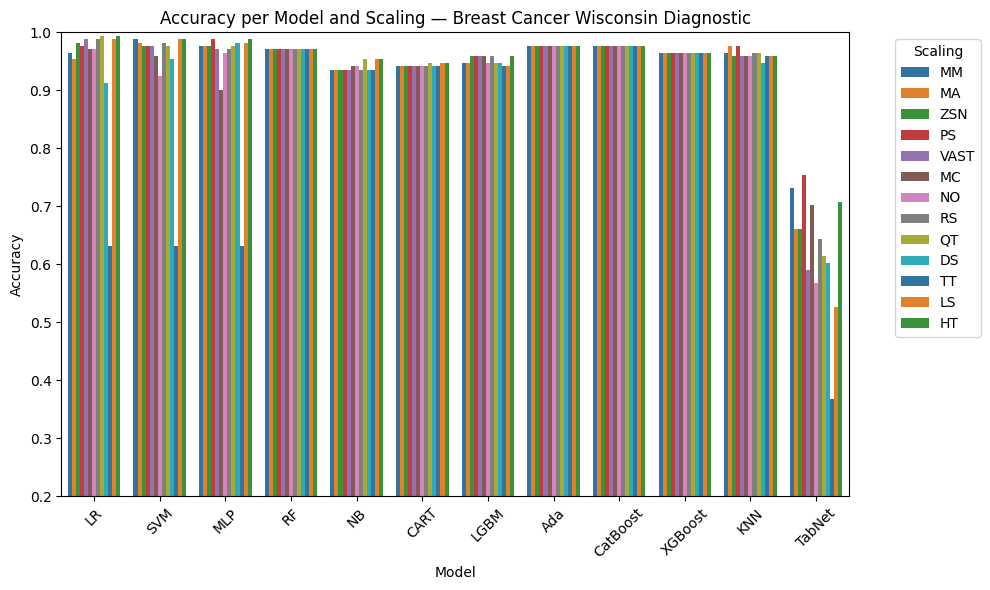

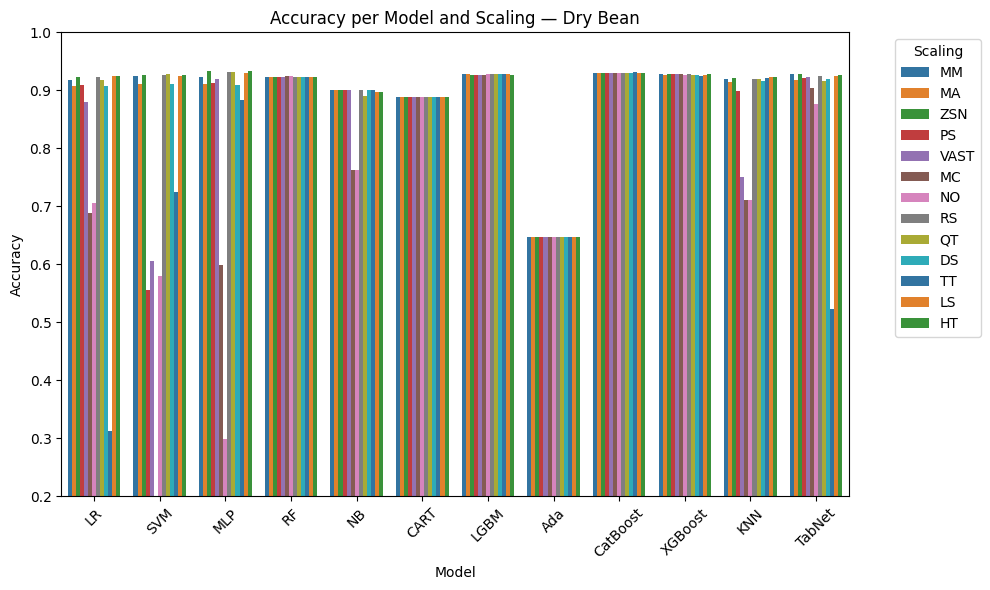

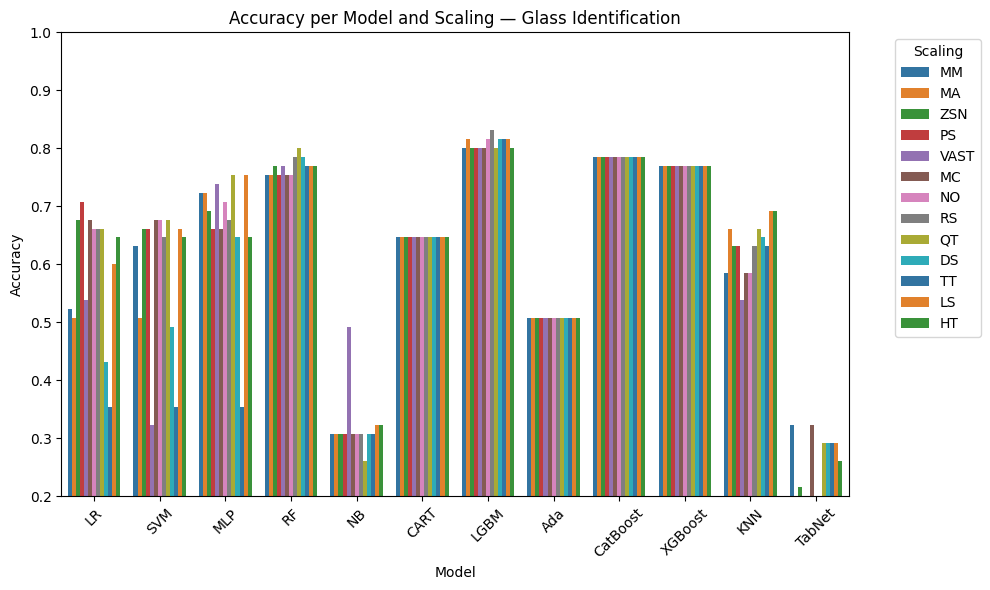

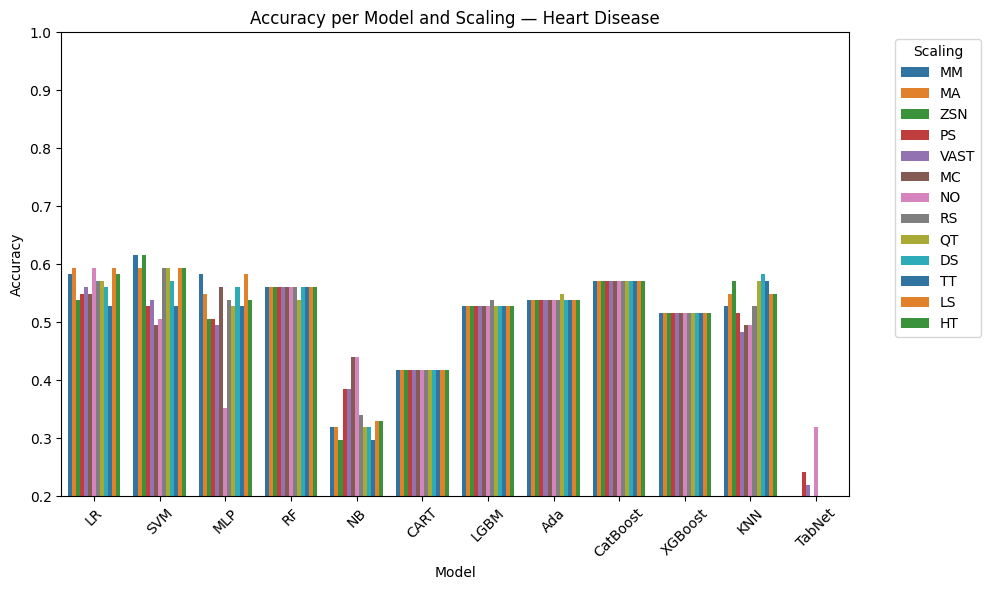

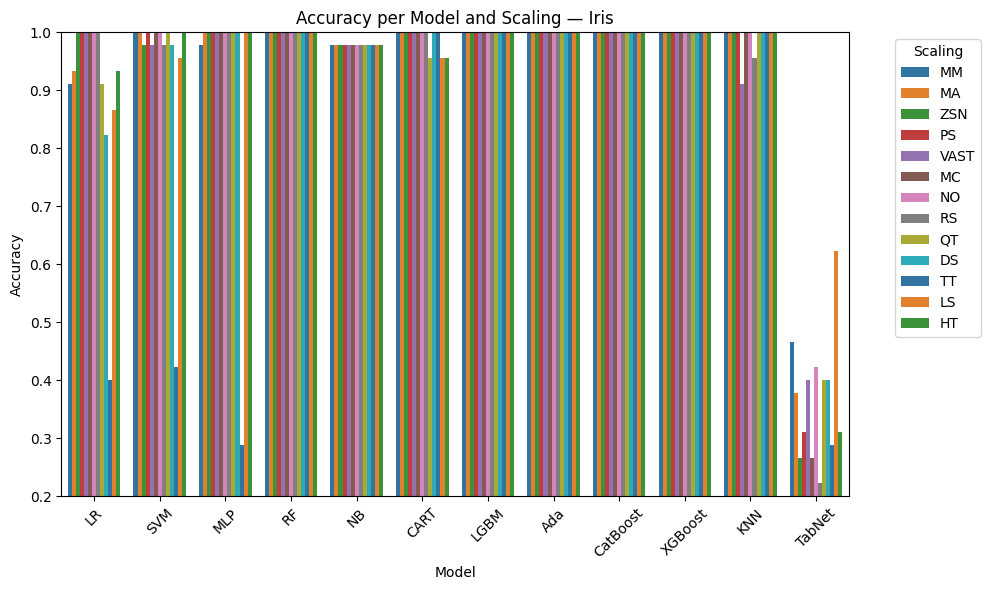

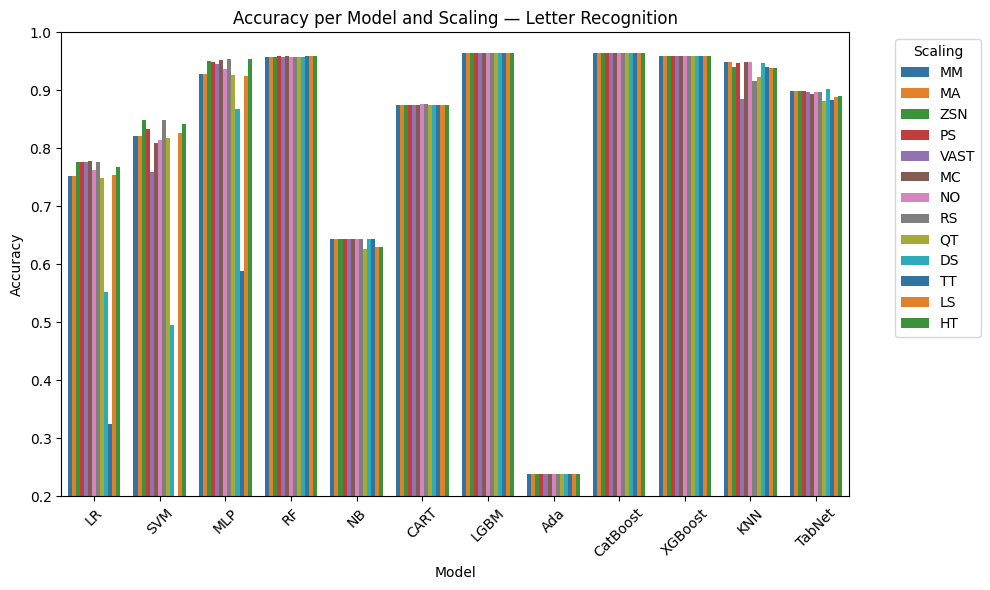

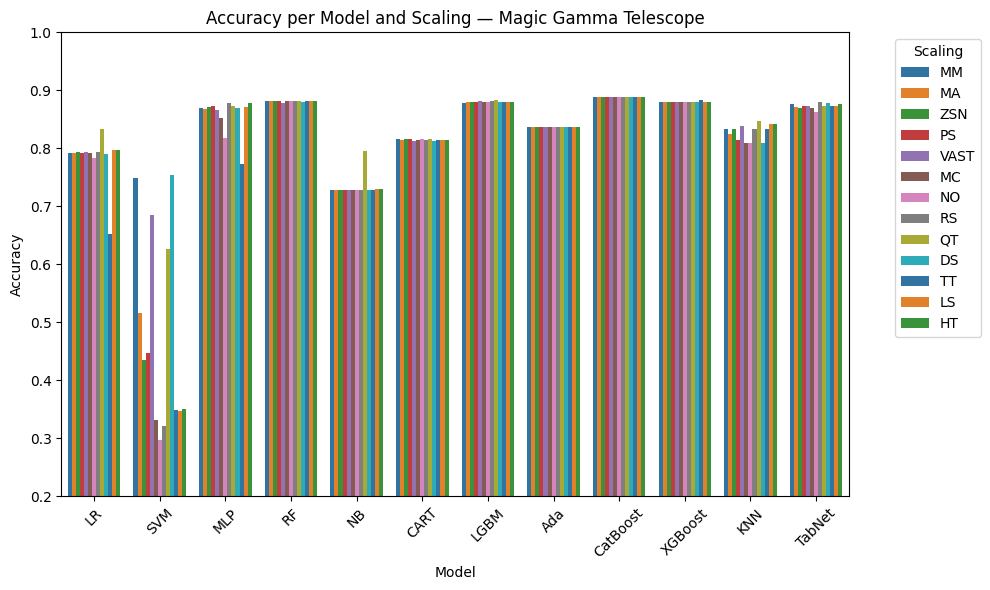

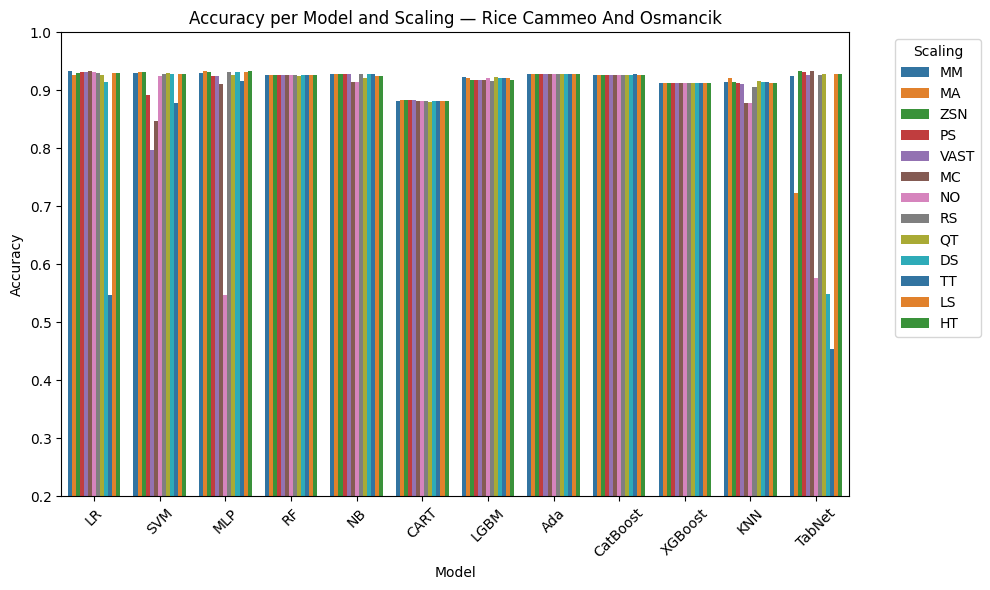

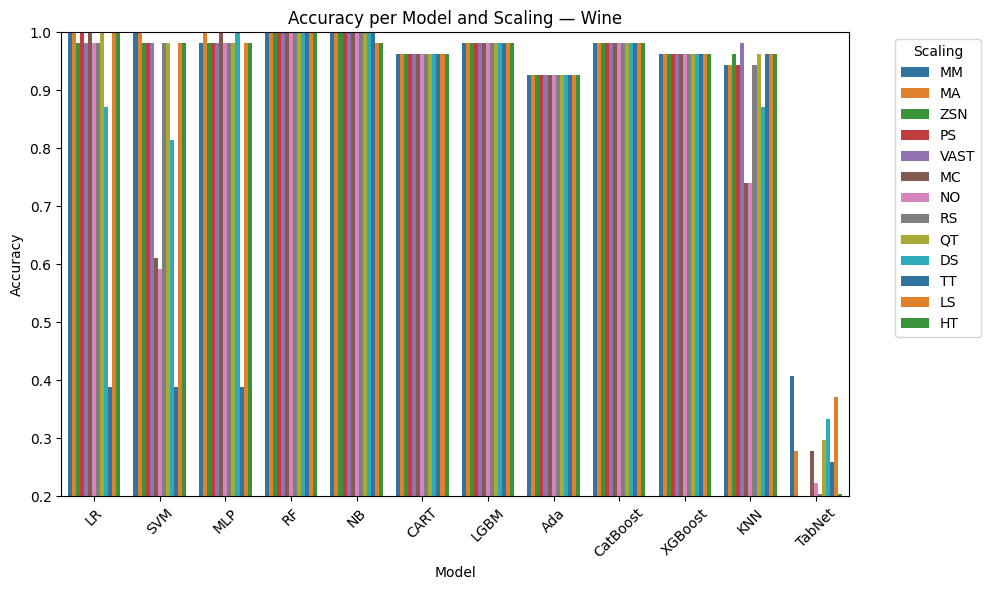

In [36]:
# Create output directory
output_dir = "results/figures_accuracy_scaling"
os.makedirs(output_dir, exist_ok=True)
import pandas as pd
import matplotlib.pyplot as plt

df_class_analysis = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['accuracy'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_accuracy.pdf", bbox_inches='tight')
    plt.close(fig)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='accuracy',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Accuracy per Model and Scaling — {nice_title}")
    plt.ylim(0.2, 1.0)
    plt.xticks(rotation=45)
    plt.ylabel("Accuracy")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_accuracy.pdf")
    plt.show()
    plt.close()


### Time to train and time do inference in classifications results

#### Tables and plot time to train

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_time_train_classification"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_train'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_time_train.pdf", bbox_inches='tight')
    plt.close(fig)


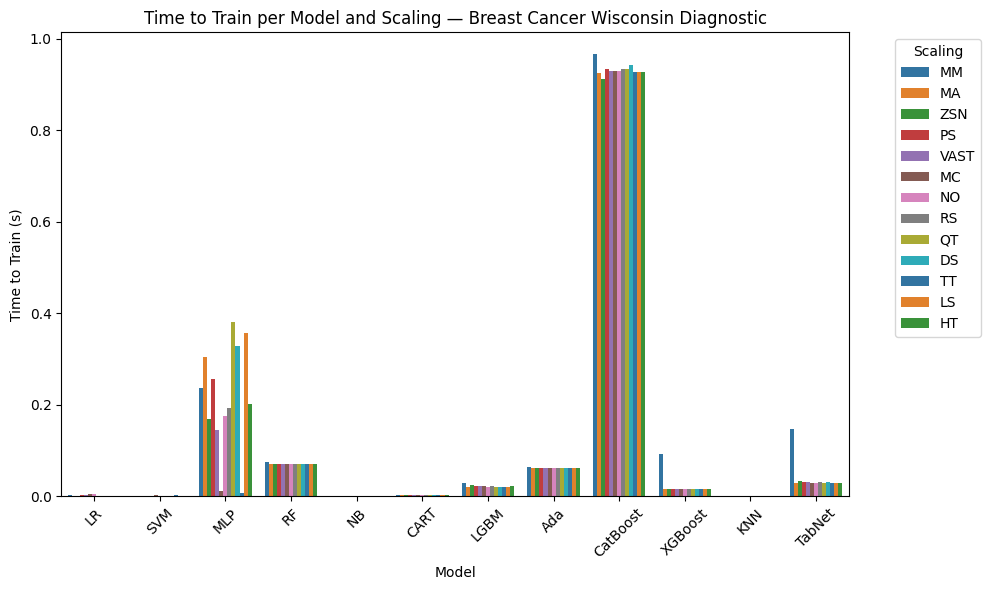

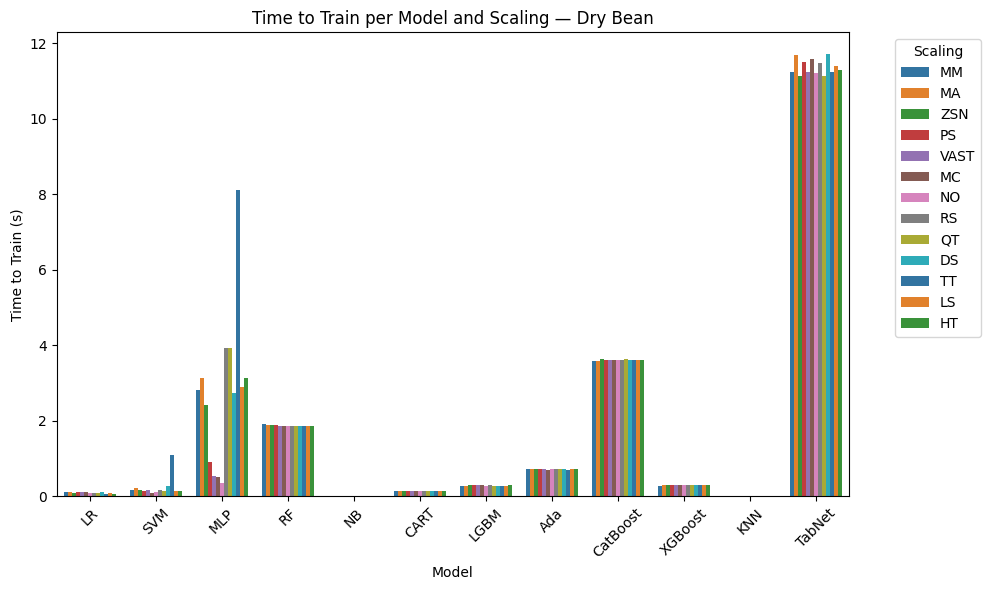

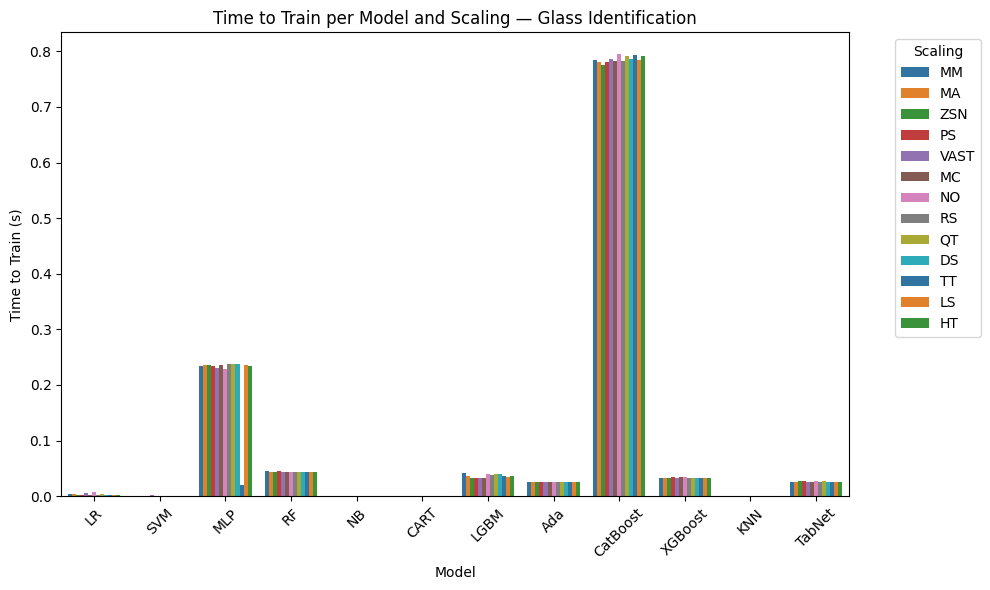

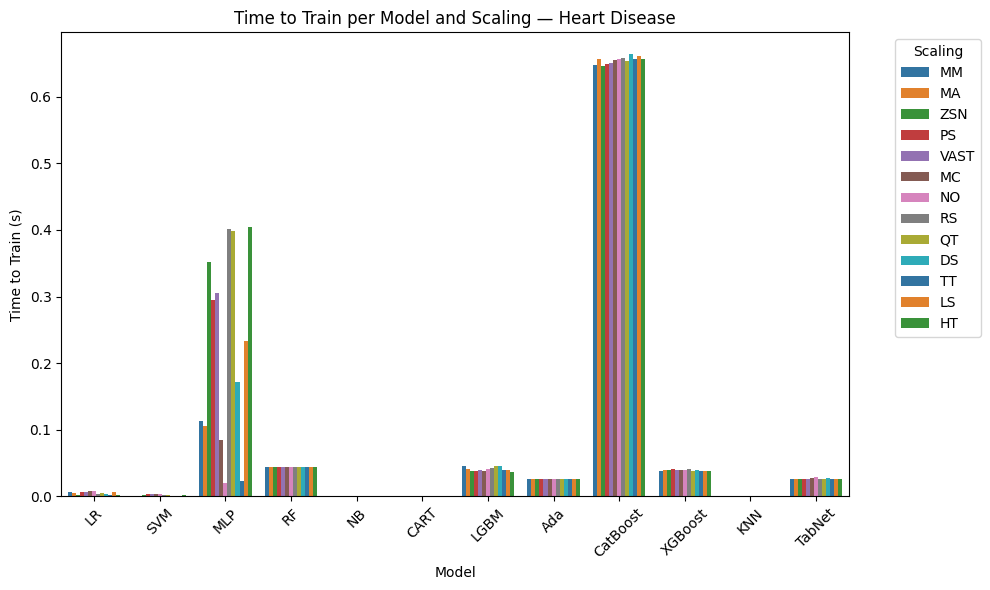

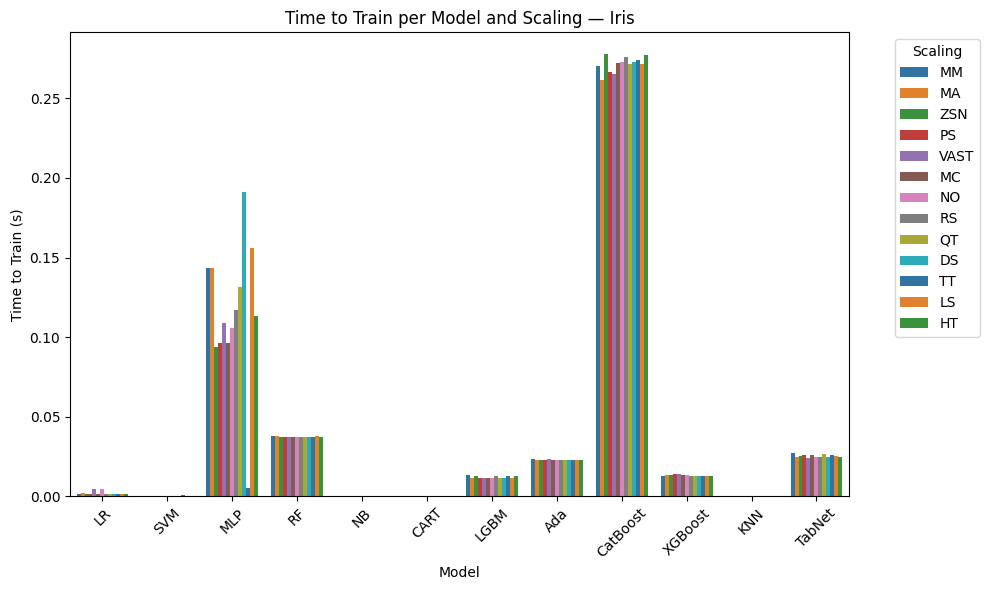

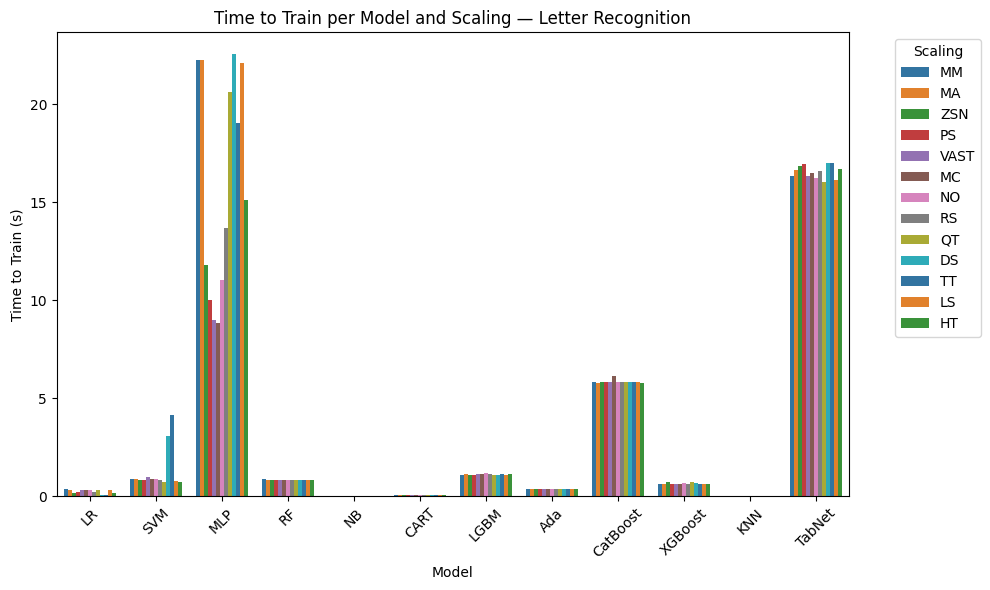

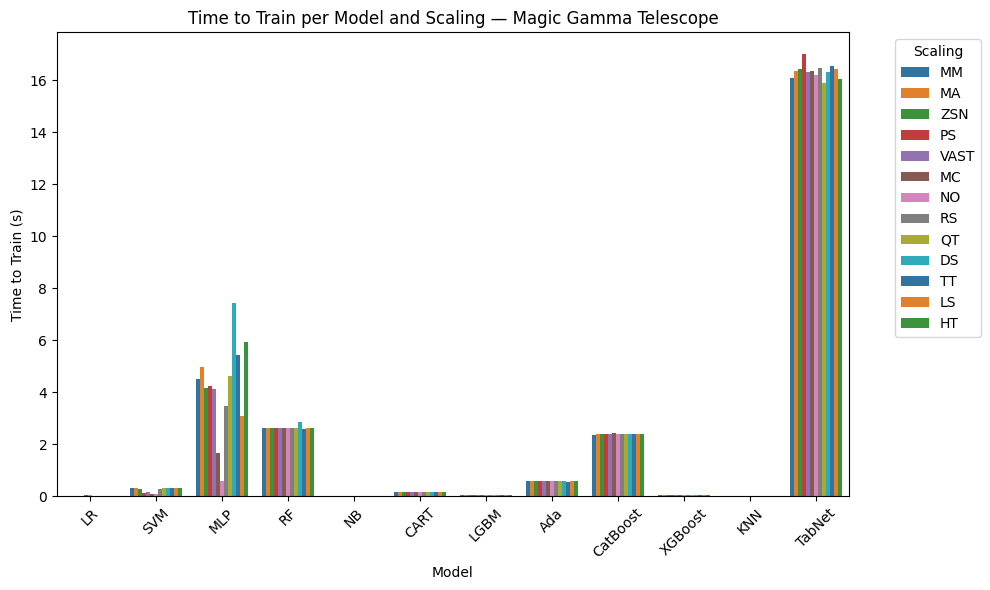

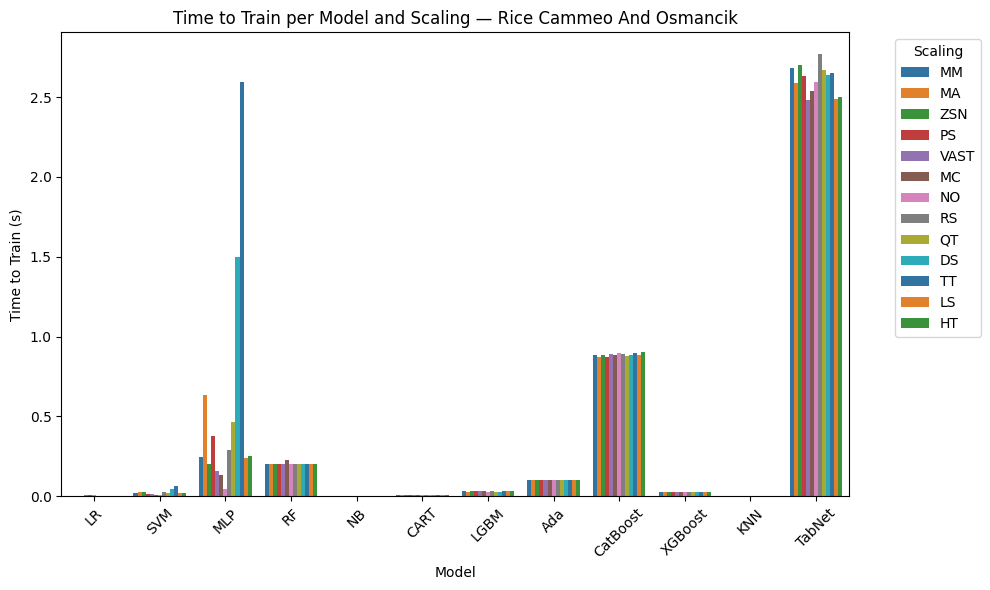

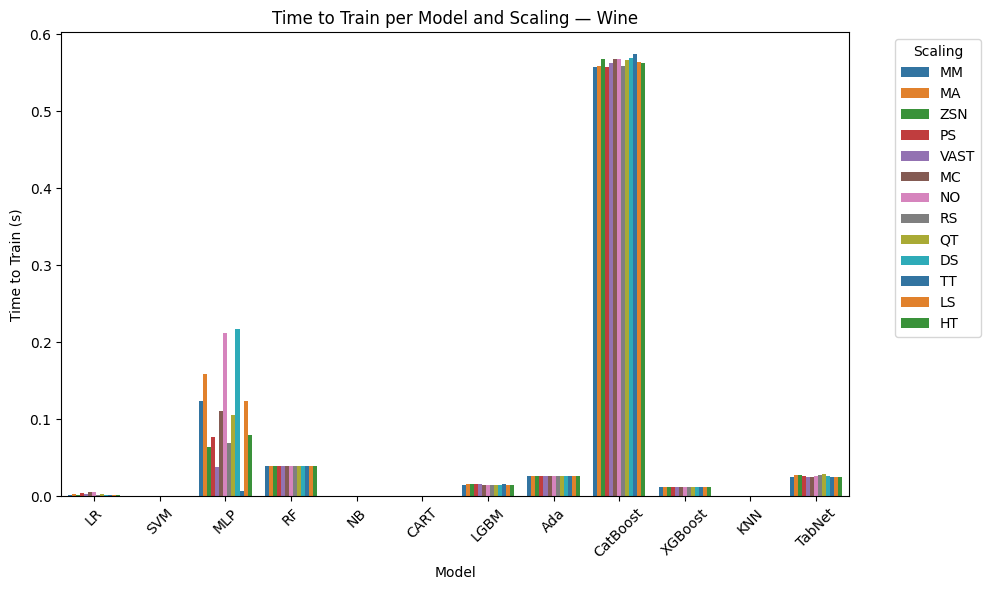

In [38]:
# Create output directory
output_dir = "results/tables_time_train_classification"
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='time_train',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Time to Train per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Time to Train (s)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_train_time.pdf")
    plt.show()
    plt.close()


#### Tables and plot time to inference

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_time_inference_classification"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_inference'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_time_inference.pdf", bbox_inches='tight')
    plt.close(fig)


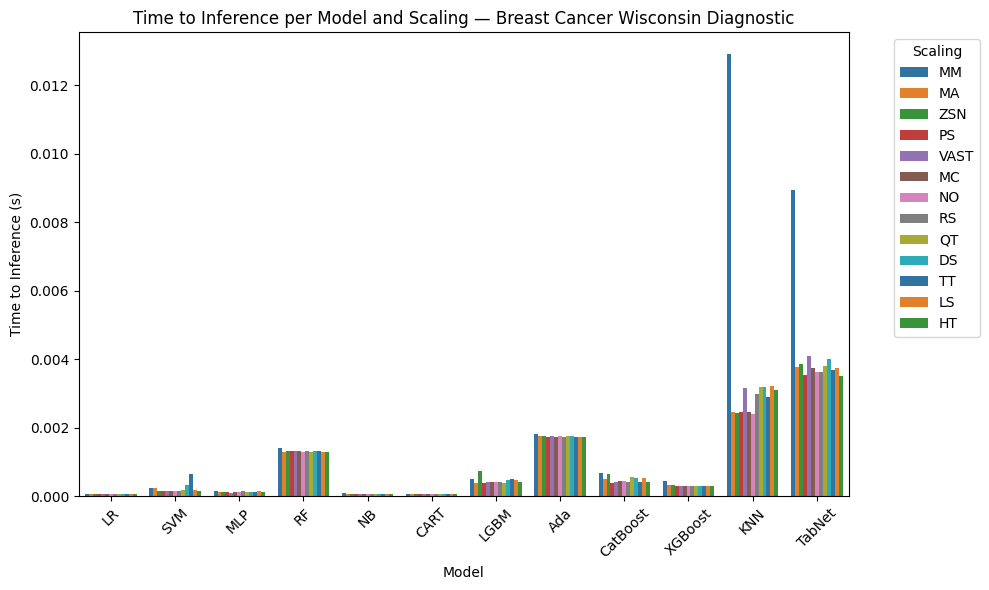

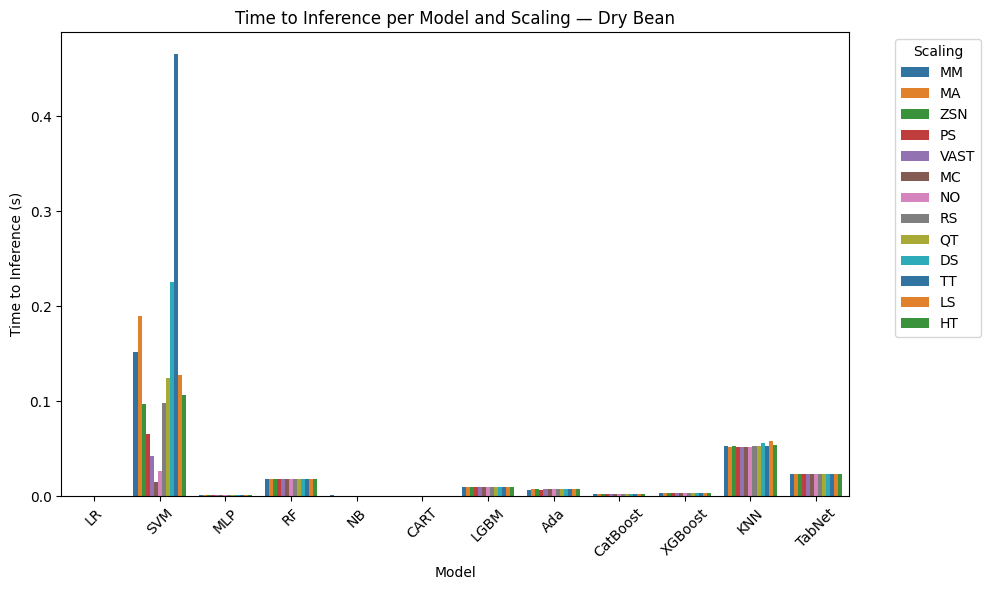

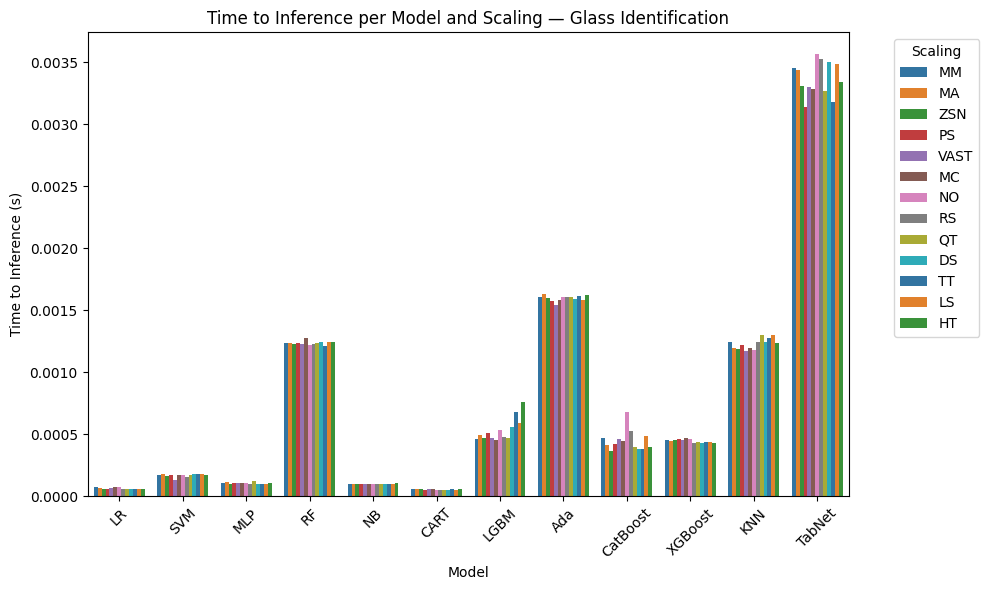

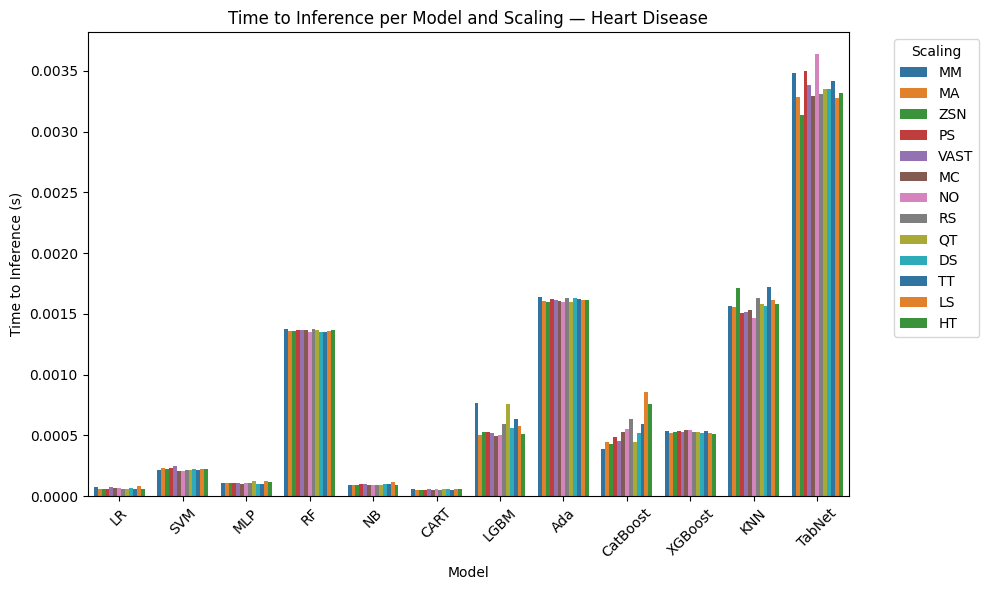

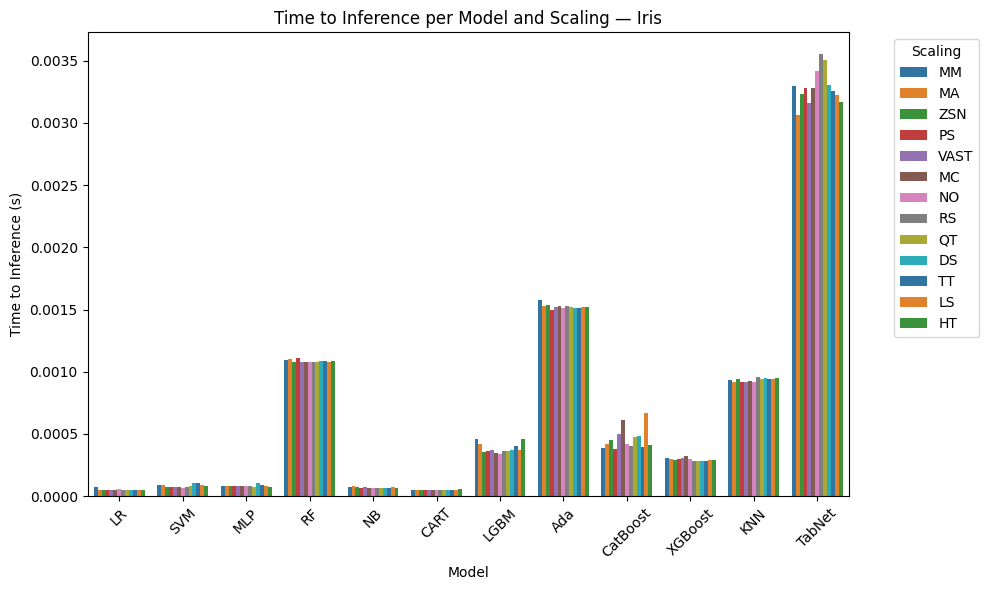

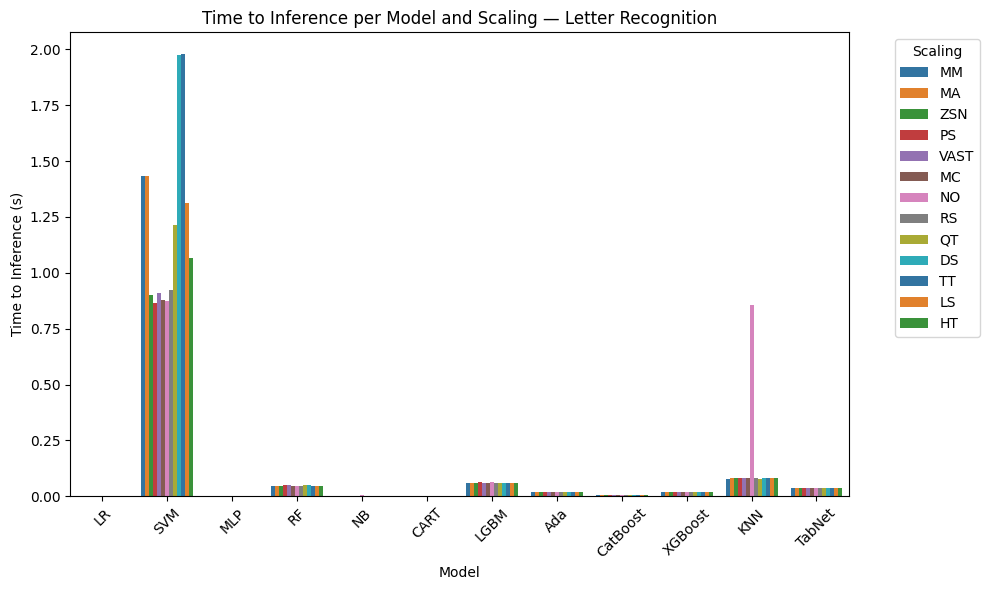

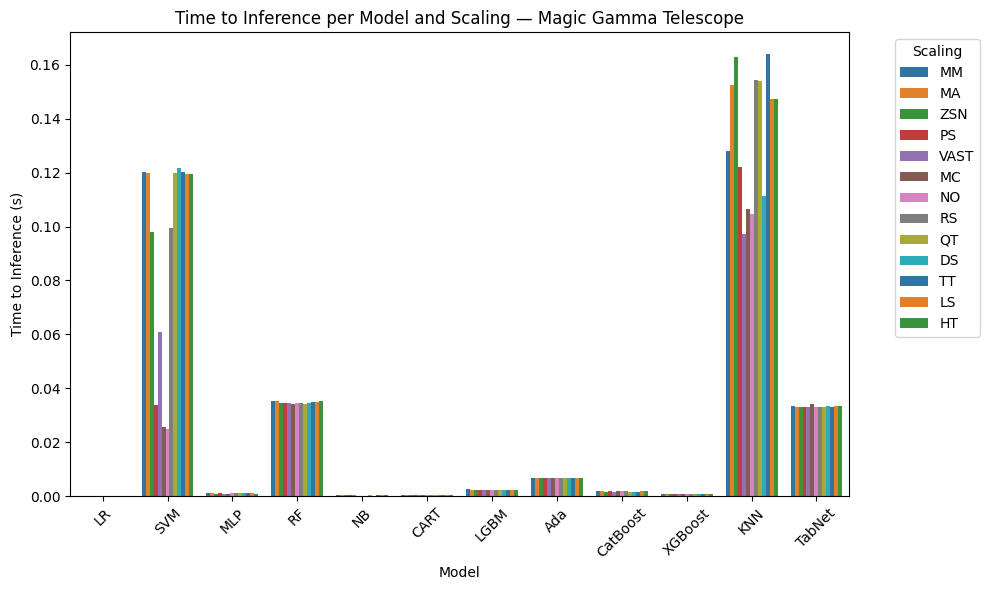

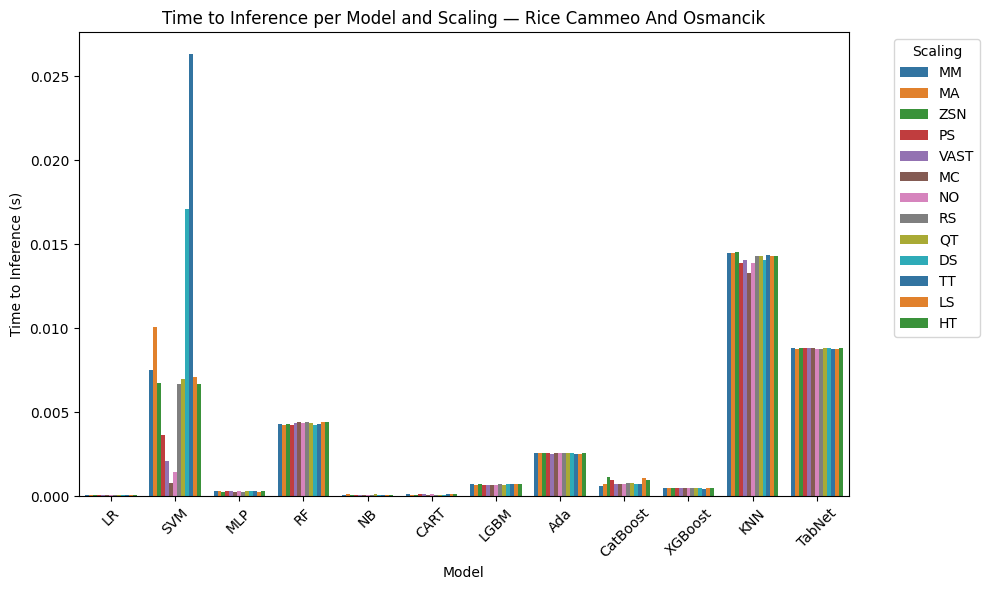

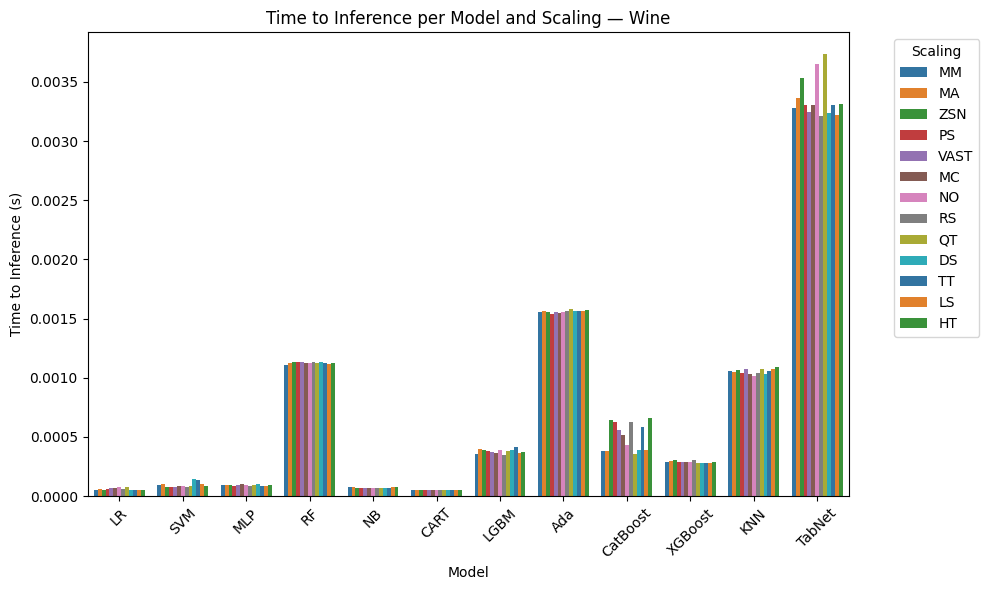

In [40]:
# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='time_inference',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Time to Inference per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Time to Inference (s)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_inference_time.pdf")
    plt.show()
    plt.close()


### Memory usage for each scaling

In [41]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Create output directory
# output_dir = "results/tables_memory_classification"
# os.makedirs(output_dir, exist_ok=True)
# df_class_analysis = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

# def bold_max_mask(df):
#     return df.eq(df.max(axis=1), axis=0)

# for dataset in df_class_analysis:
#     df_filtered_class = df_results[df_results['dataset_name'] == dataset]
#     heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['memory_used_kb'].mean().unstack()
#     heat_df = heat_df.round(4)

#     bold_mask = bold_max_mask(heat_df)

#     fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
#     ax.axis('off')
#     # ax.set_title(
#     #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
#     #     fontsize=14, weight='bold'
#     # )

#     table = ax.table(
#         cellText=heat_df.values,
#         rowLabels=heat_df.index,
#         colLabels=heat_df.columns,
#         loc='center',
#         cellLoc='center'
#     )

#     table.auto_set_font_size(False)
#     table.set_fontsize(10)
#     table.scale(1, 1.5)

#     # Bold max values
#     for i, row in enumerate(bold_mask.values):
#         for j, is_bold in enumerate(row):
#             if is_bold:
#                 cell = table[(i + 1, j)]
#                 cell.set_fontsize(10)
#                 cell.set_text_props(weight='bold')

#     # Save one PDF per dataset
#     plt.savefig(f"{output_dir}/{dataset}_table_memory.pdf", bbox_inches='tight')
#     plt.close(fig)


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Assume df_results is a pre-existing DataFrame with your experimental data
# It should contain columns: 'dataset_name', 'scaling_abbrev', 'memory_used_kb', 'accuracy'

# Create output directory if it doesn't exist
output_dir = "results/tables_memory_classification"
os.makedirs(output_dir, exist_ok=True)

# Get unique dataset names that have valid results
df_class_analysis = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

# --- Adjusted Logic Starts Here ---

# 1. Create a dictionary to hold the mean memory usage for each dataset
mean_memory_data = {}

# 2. Loop through each dataset to calculate the mean memory per scaling method
for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    
    # Group by ONLY the scaling abbreviation and calculate the mean memory across all models
    mean_memory_by_scaling = df_filtered_class.groupby('scaling_abbrev')['memory_used_kb'].mean()
    
    # Add the result (a pandas Series) to our dictionary
    mean_memory_data[dataset] = mean_memory_by_scaling

# 3. Create a single, consolidated DataFrame from the dictionary of results
# The .T transposes the DataFrame, making datasets the rows and scalings the columns.
final_summary_df = pd.DataFrame(mean_memory_data).T

# Round the data for cleaner presentation
final_summary_df = final_summary_df.round(4)

# Optional: Sort columns alphabetically for consistency
final_summary_df = final_summary_df.reindex(sorted(final_summary_df.columns), axis=1)


# 4. Generate and save the final table visualization
# Adjust figsize dynamically based on the number of datasets
fig, ax = plt.subplots(figsize=(14, 0.5 * len(final_summary_df) + 1.5))
ax.axis('off')
ax.set_title(
    "Mean Memory Usage (Kb) by Dataset and Scaling Method",
    fontsize=16, weight='bold', pad=20
)

table = ax.table(
    cellText=final_summary_df.values,
    rowLabels=final_summary_df.index,
    colLabels=final_summary_df.columns,
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8) # Adjusted scale for better readability

# Save the single consolidated table to a PDF
output_path = f"{output_dir}/summary_mean_memory_by_scaling.pdf"
plt.savefig(output_path, bbox_inches='tight')
plt.close(fig)

In [43]:
# # Create output directory
# os.makedirs(output_dir, exist_ok=True)

# # List of datasets to process
# datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

# for dataset in datasets:
#     df_filtered = df_results[df_results['dataset_name'] == dataset]
#     nice_title = name_mapping.get(dataset, dataset)
    
#     plt.figure(figsize=(10, 6))
#     sns.barplot(
#         data=df_filtered,
#         x='model',
#         y='memory_used_kb',
#         hue='scaling_abbrev',
#         palette='tab10'
#     )
#     plt.title(f"Memory Usage (Kb) per Model and Scaling — {nice_title}")
#     plt.ylim()
#     plt.xticks(rotation=45)
#     plt.ylabel("Memory Usage (Kb)")
#     plt.xlabel("Model")
#     plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
    
#     # Save figure
#     plt.savefig(f"{output_dir}/{dataset}_memory.pdf")
#     plt.show()
#     plt.close()


## Classifications Results

### Regression results for in each dataset for each model and scaling

#### $R^2$

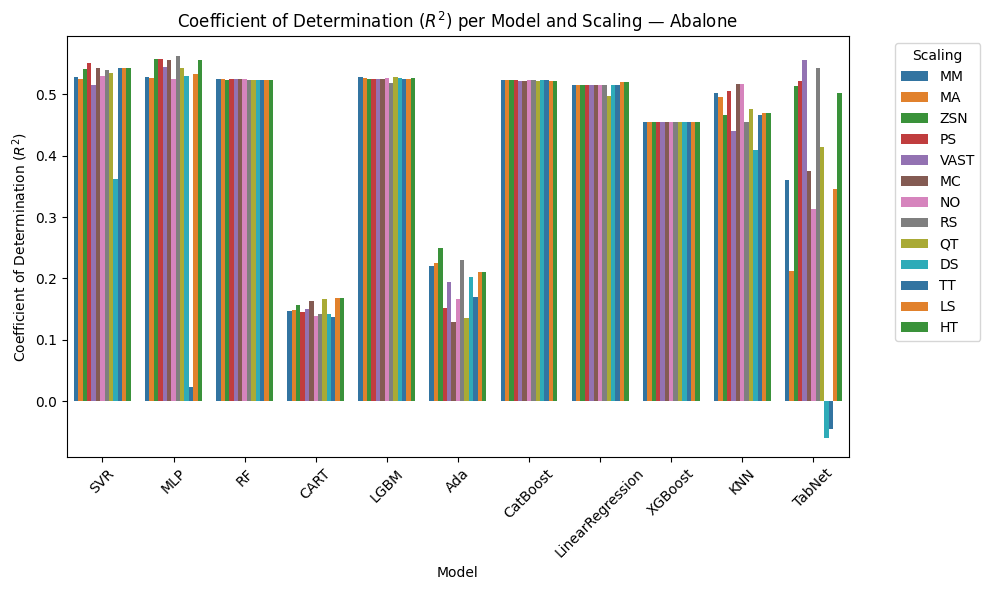

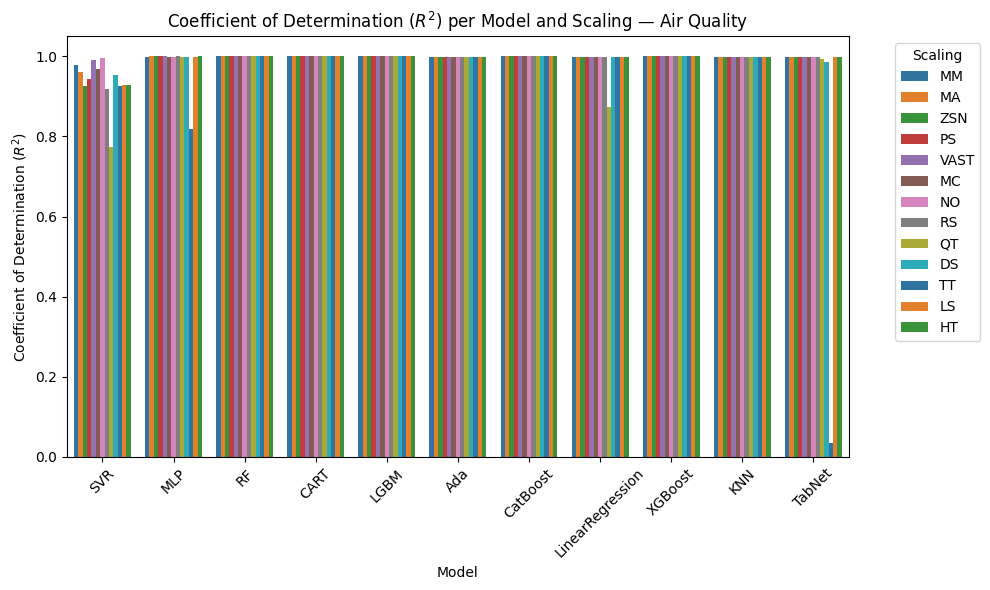

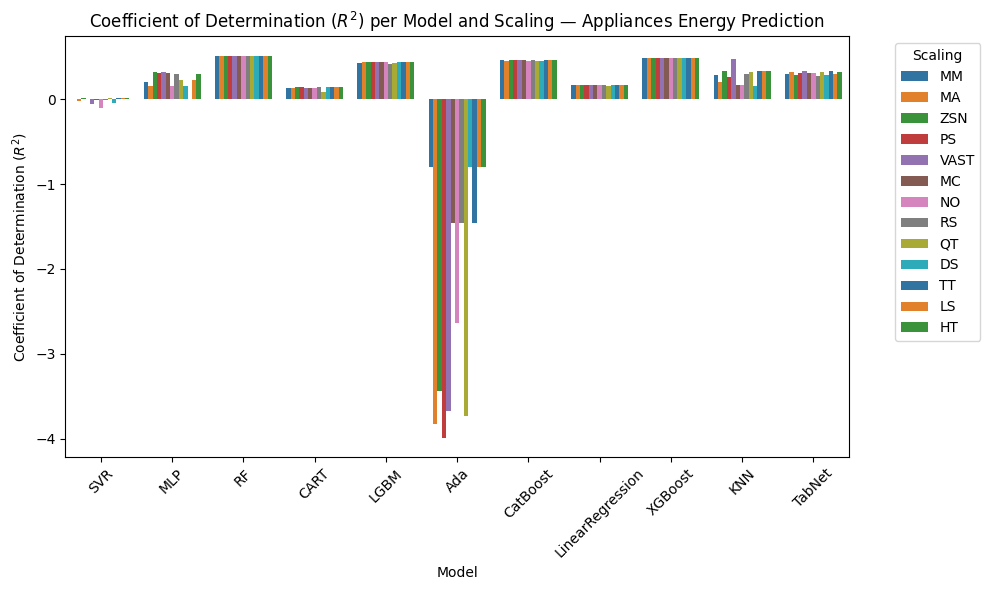

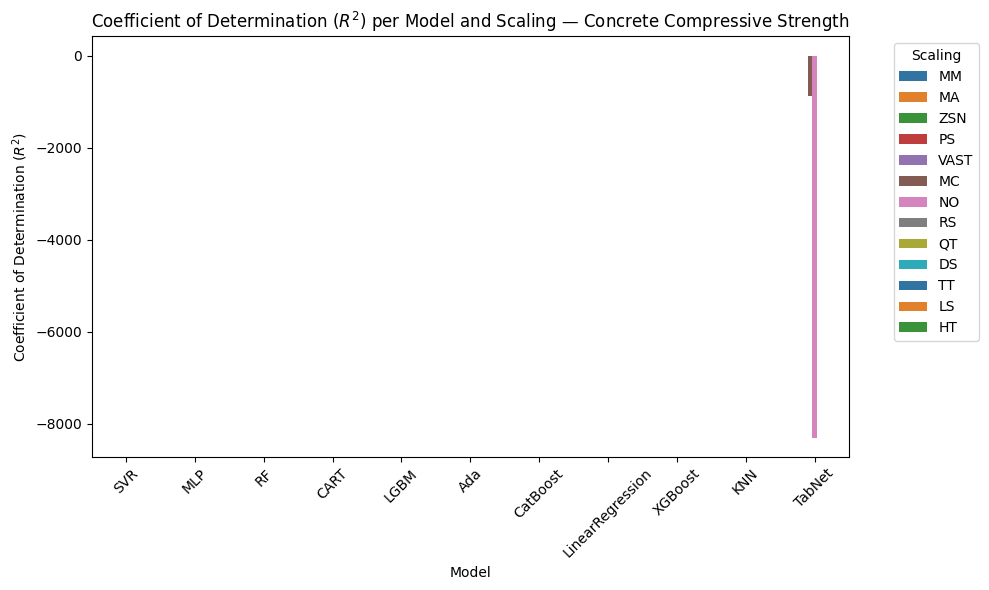

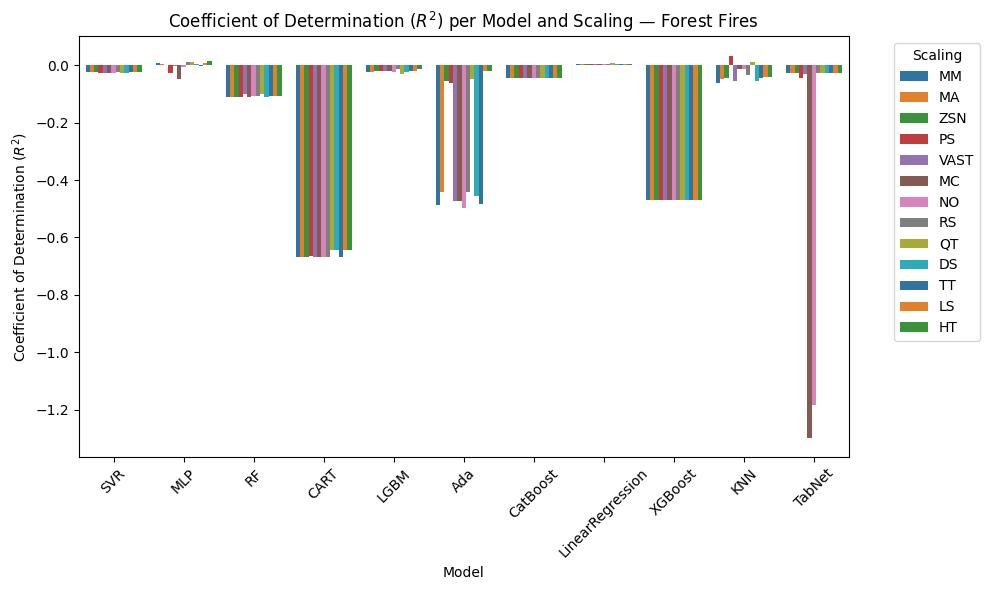

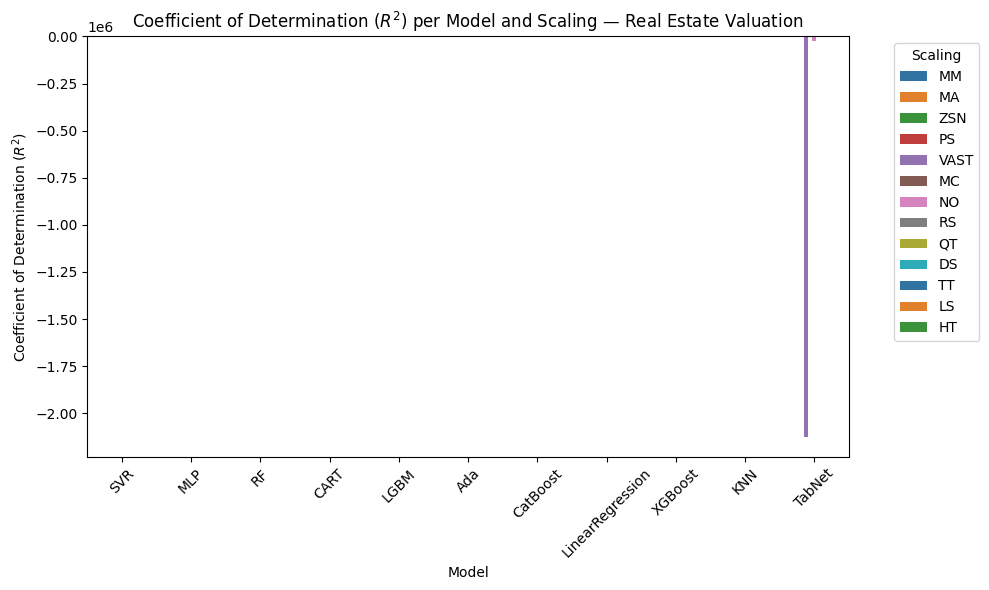

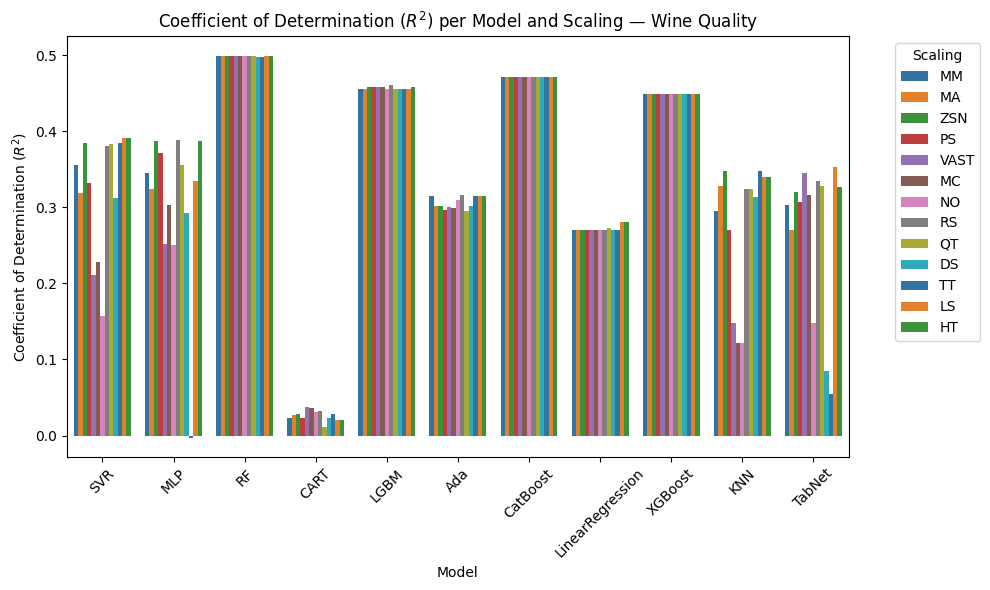

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_r2_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['r2score'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['r2score'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_r2score.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['r2score'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='r2score',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Coefficient of Determination ($R^2$) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Coefficient of Determination ($R^2$)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_r2score.pdf")
    plt.show()
    plt.close()


#### Mean Squared Error (MSE)

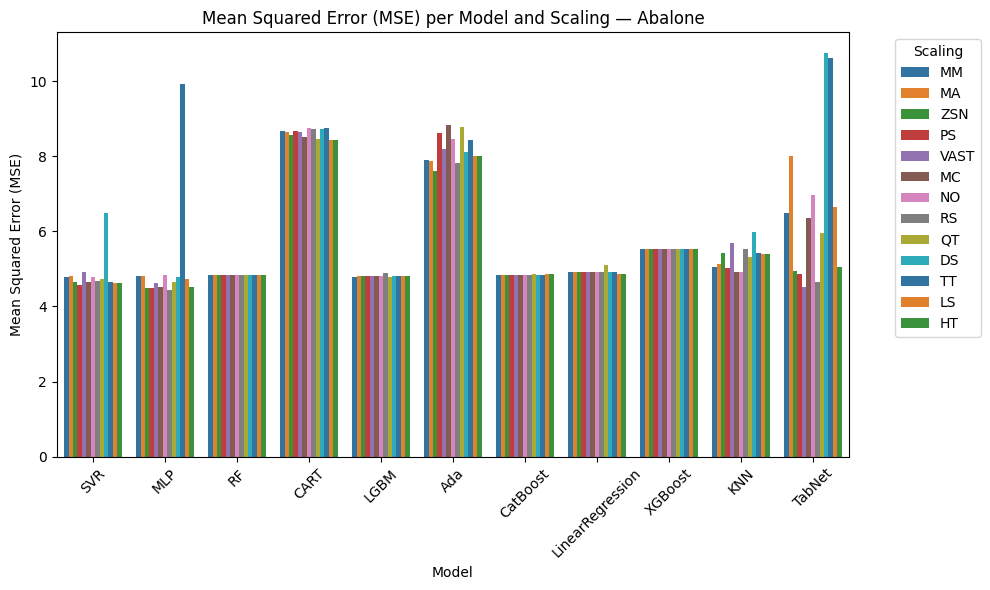

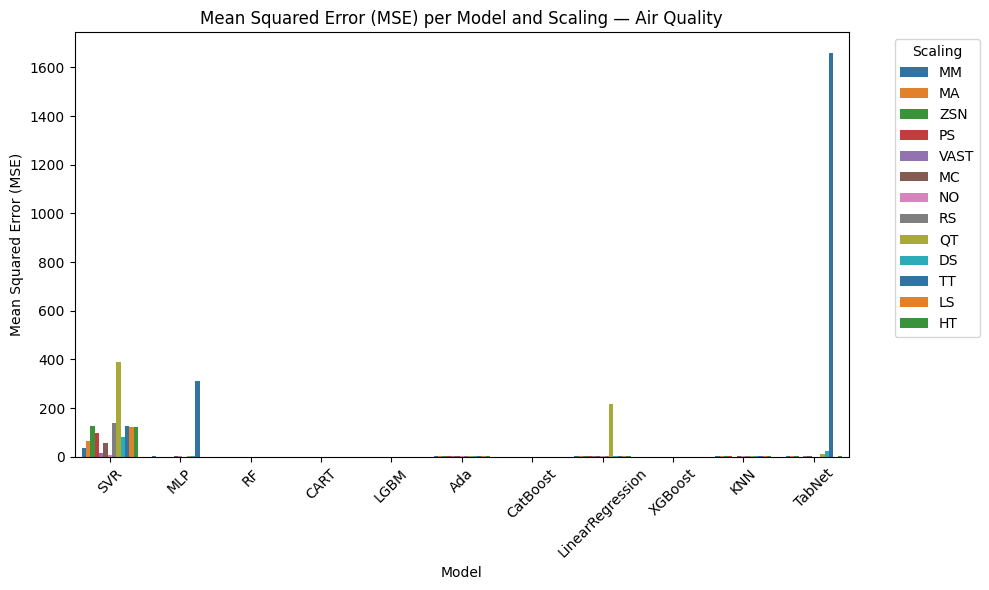

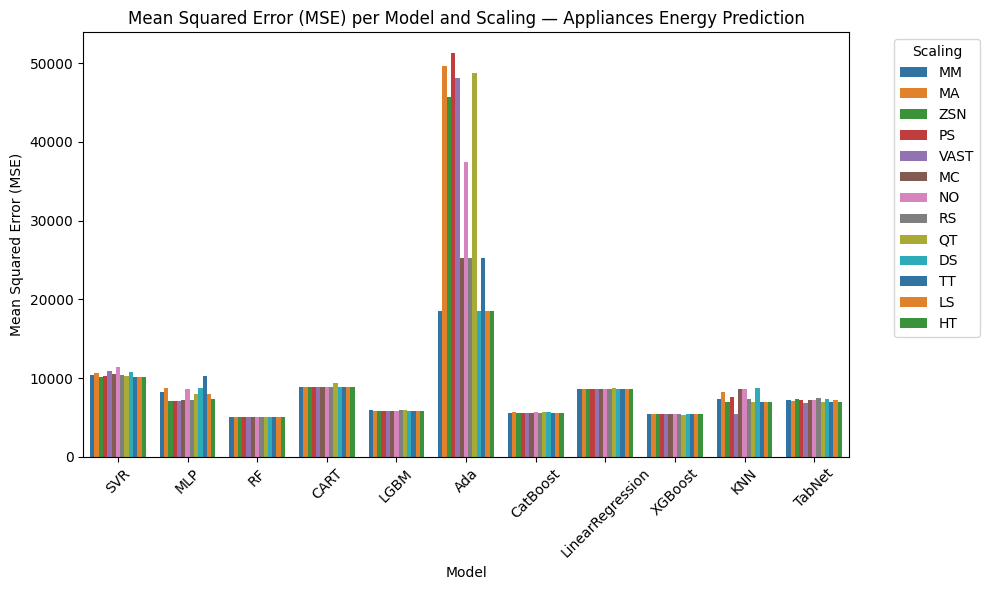

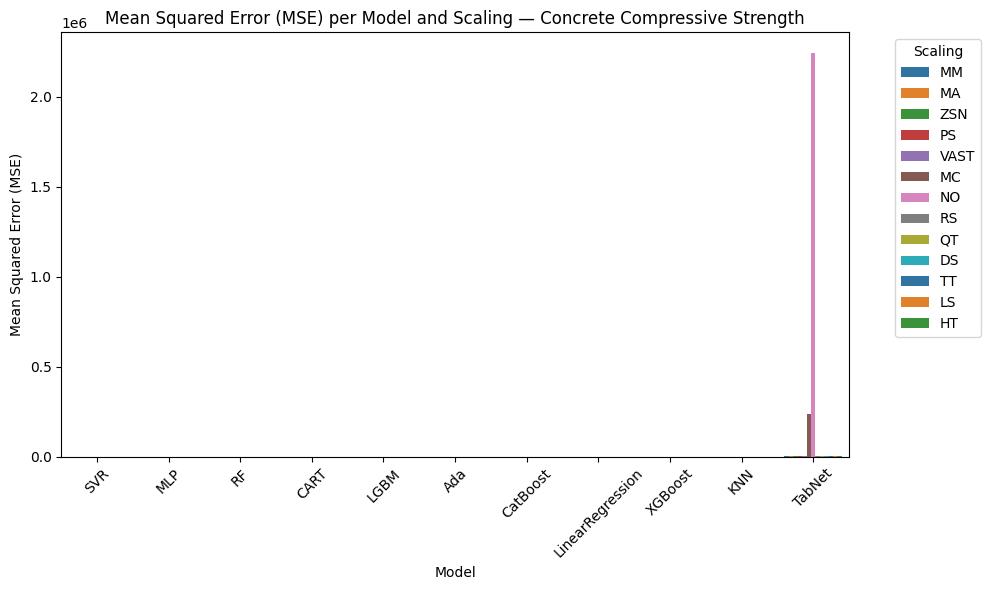

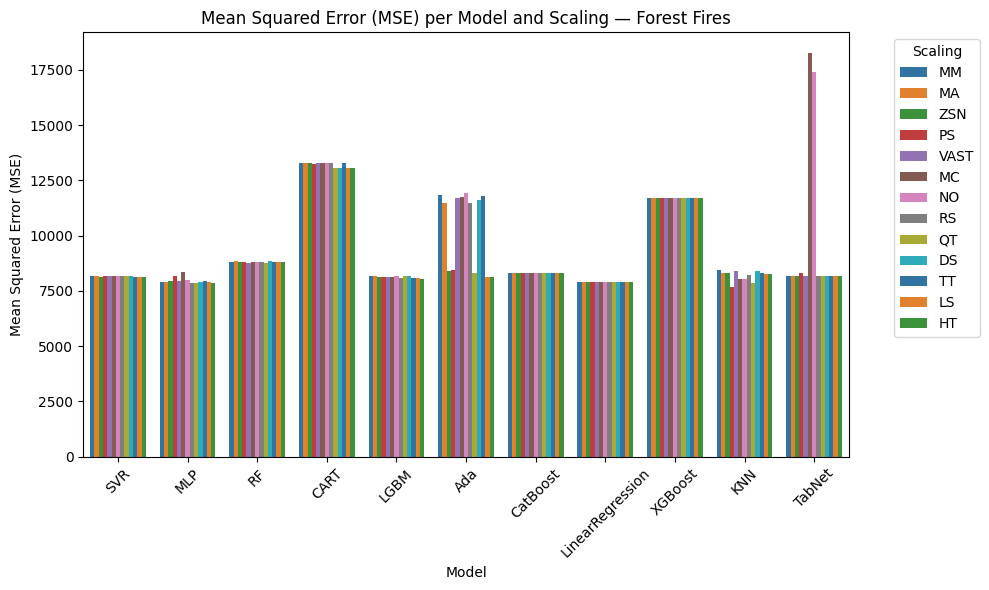

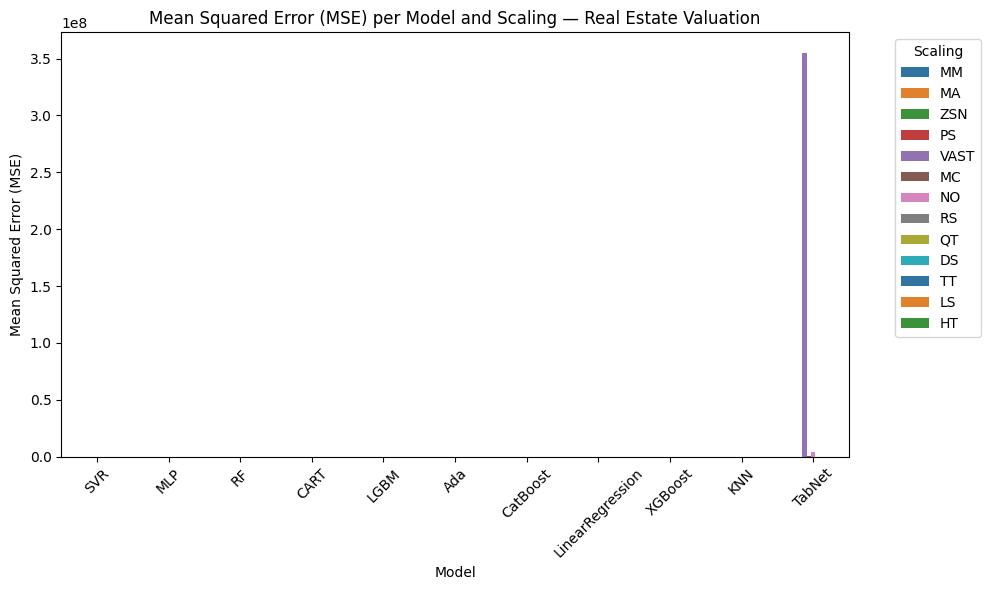

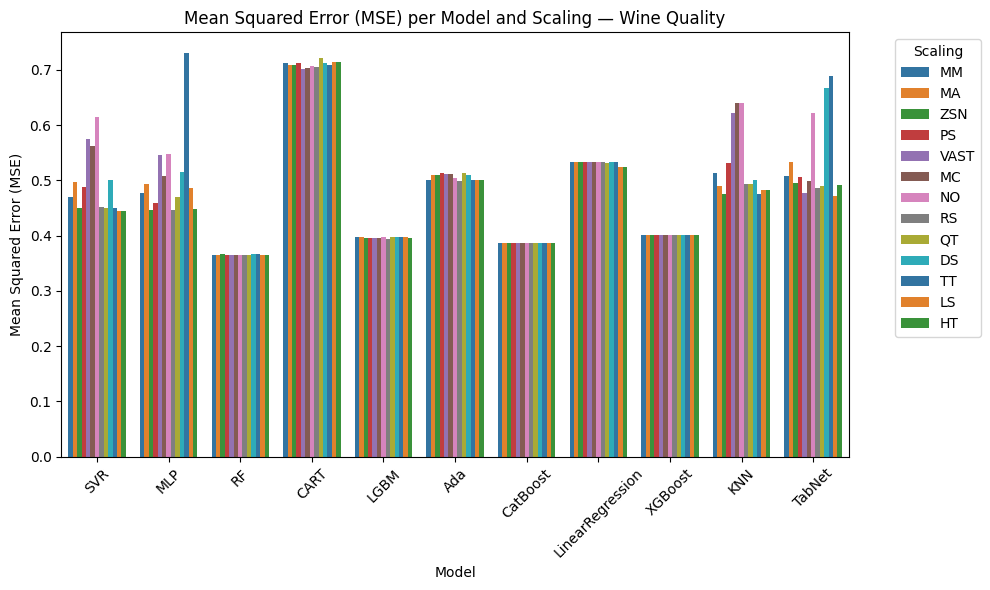

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_mse_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['mse'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['mse'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_mse.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['mse'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='mse',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Mean Squared Error (MSE) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Mean Squared Error (MSE)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_mse.pdf")
    plt.show()
    plt.close()


#### MAE

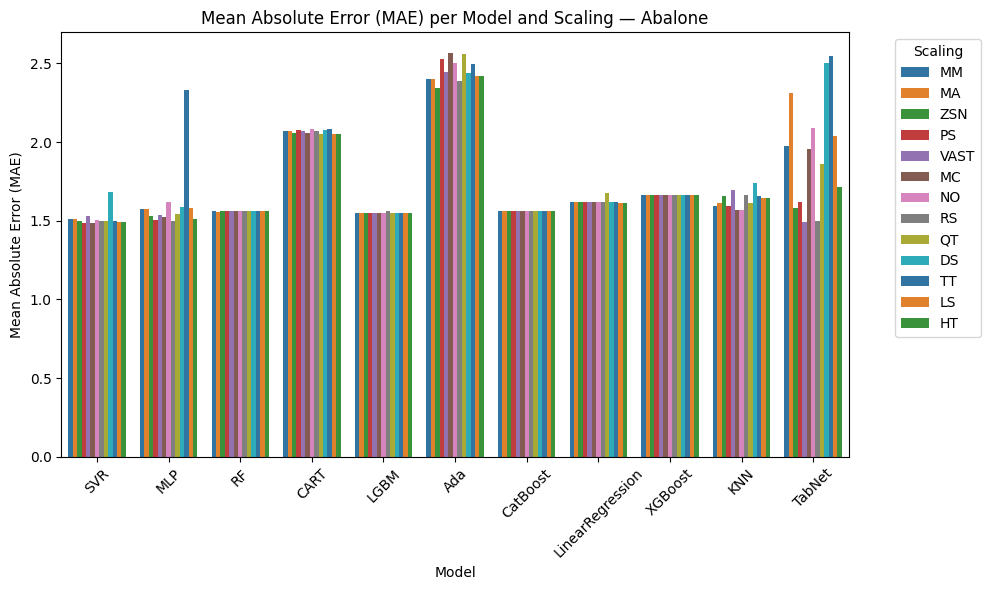

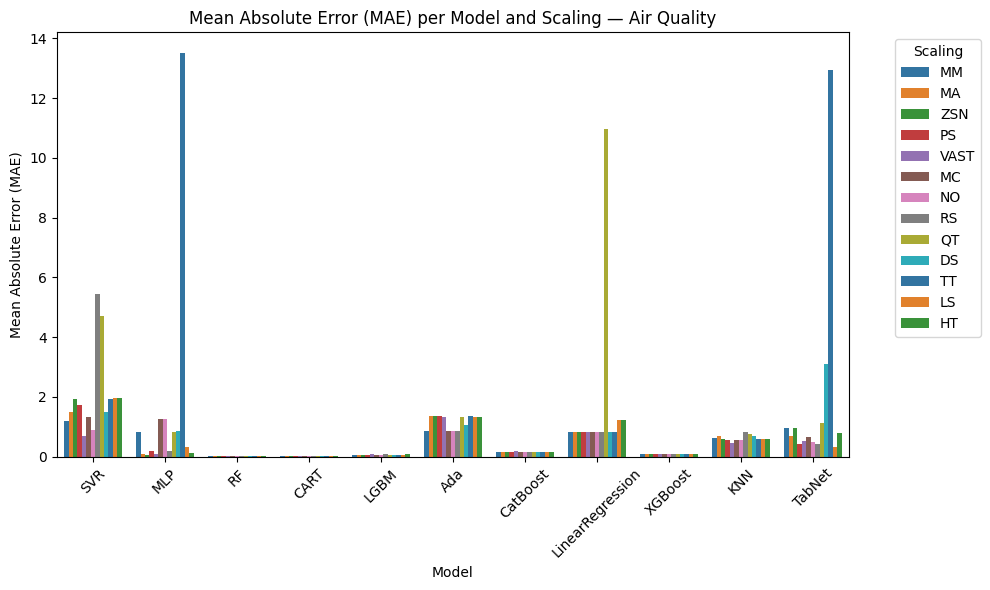

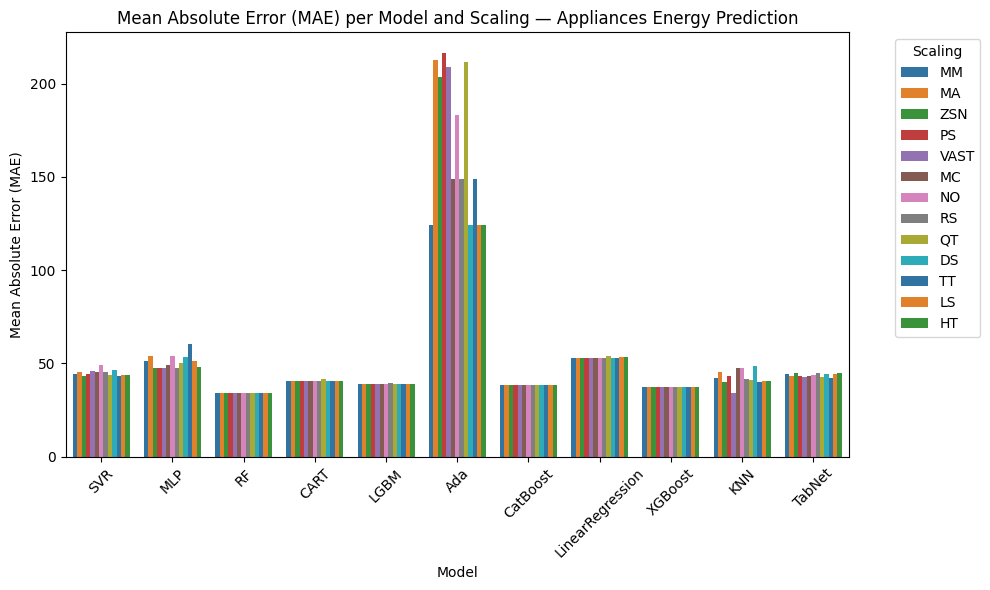

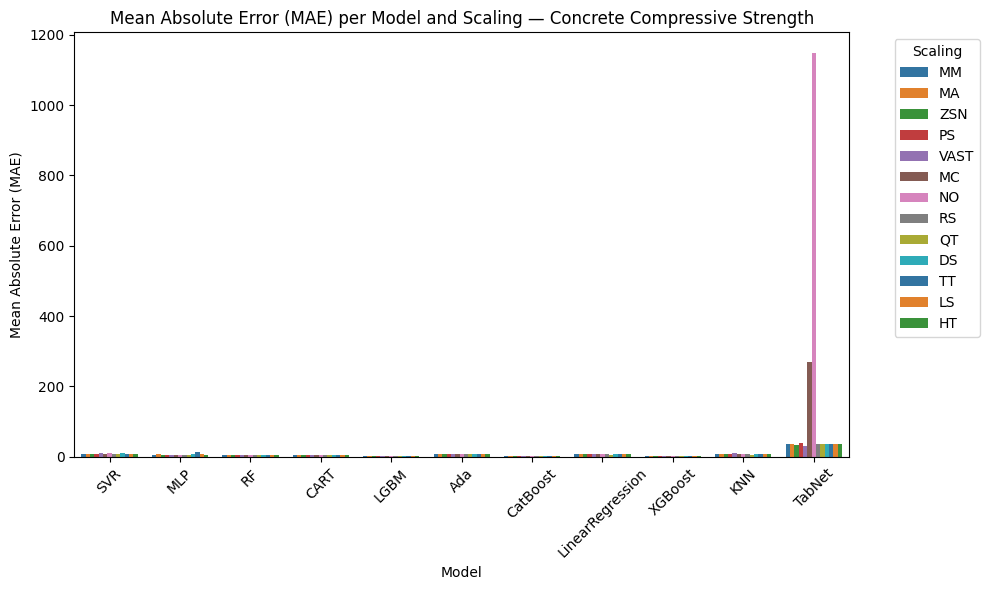

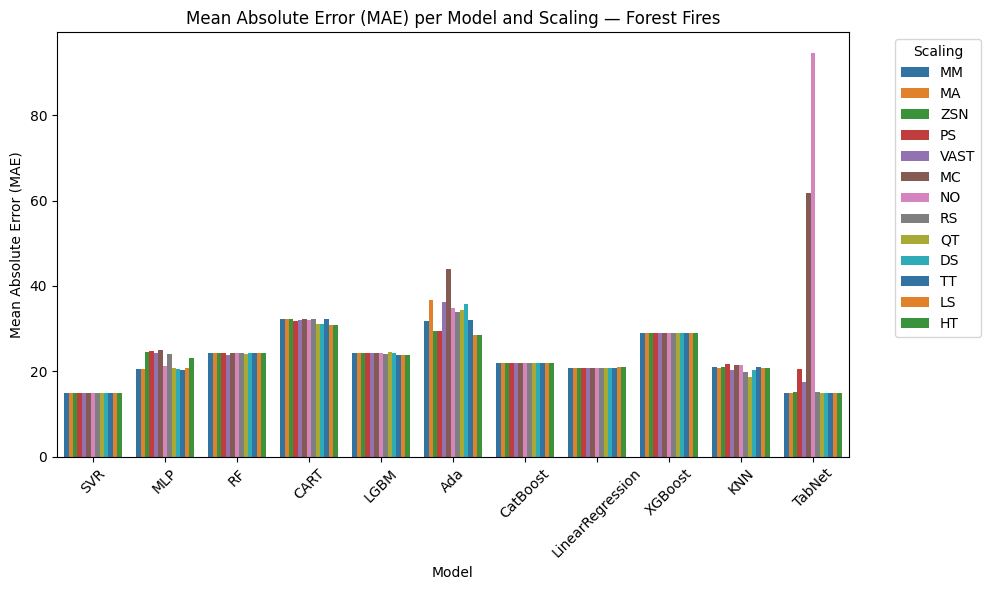

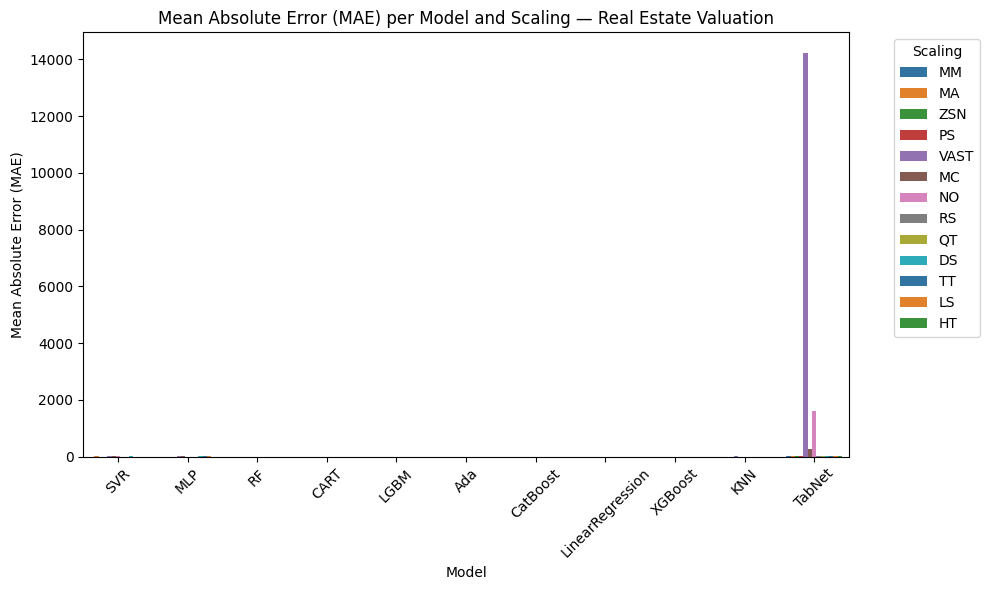

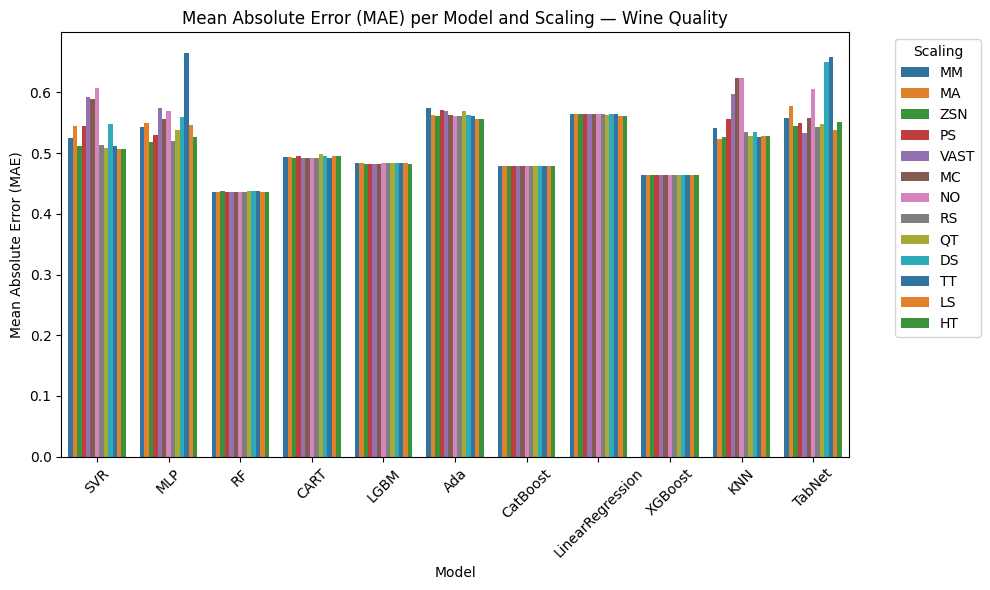

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_mae_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['mae'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_mae.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='mae',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Mean Absolute Error (MAE) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Mean Absolute Error (MAE)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_mae.pdf")
    plt.show()
    plt.close()


### Time to train and time do inference in regression results

#### Time to train

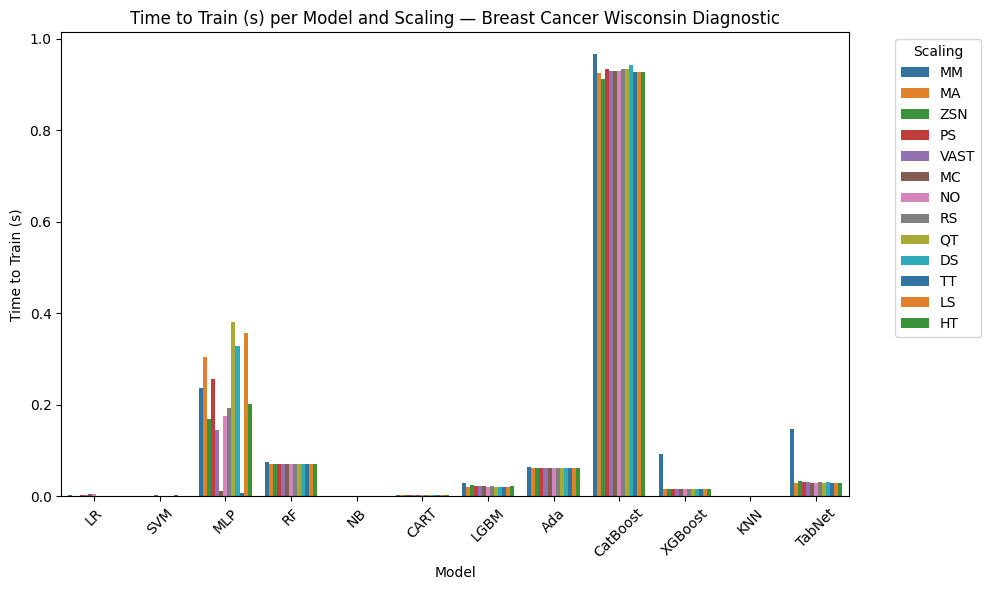

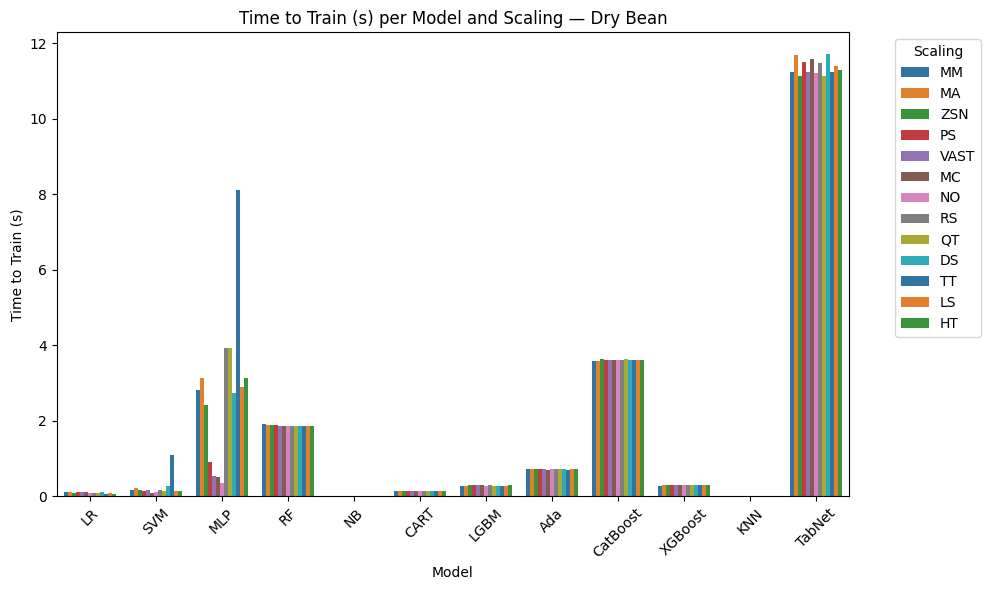

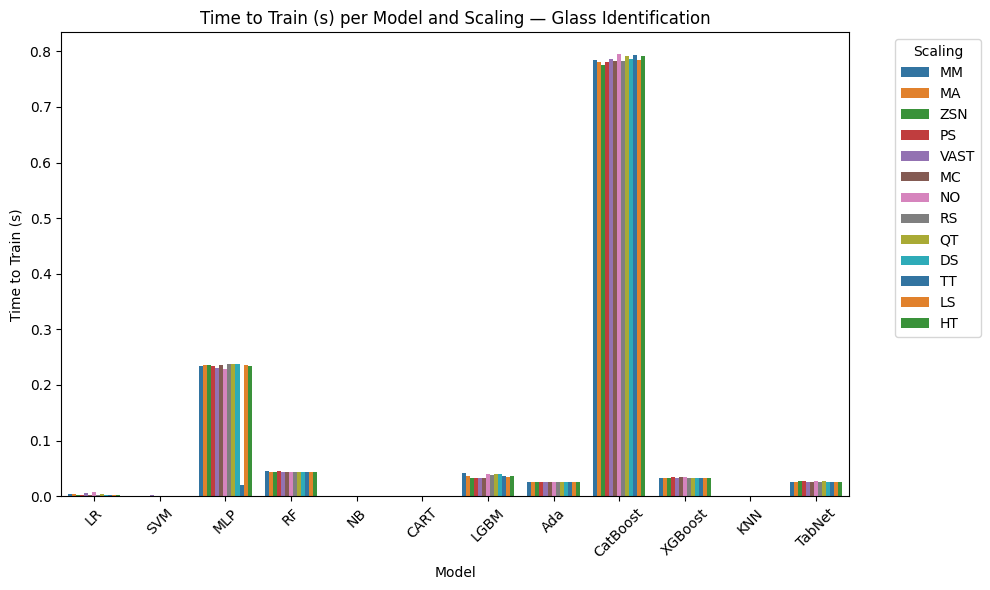

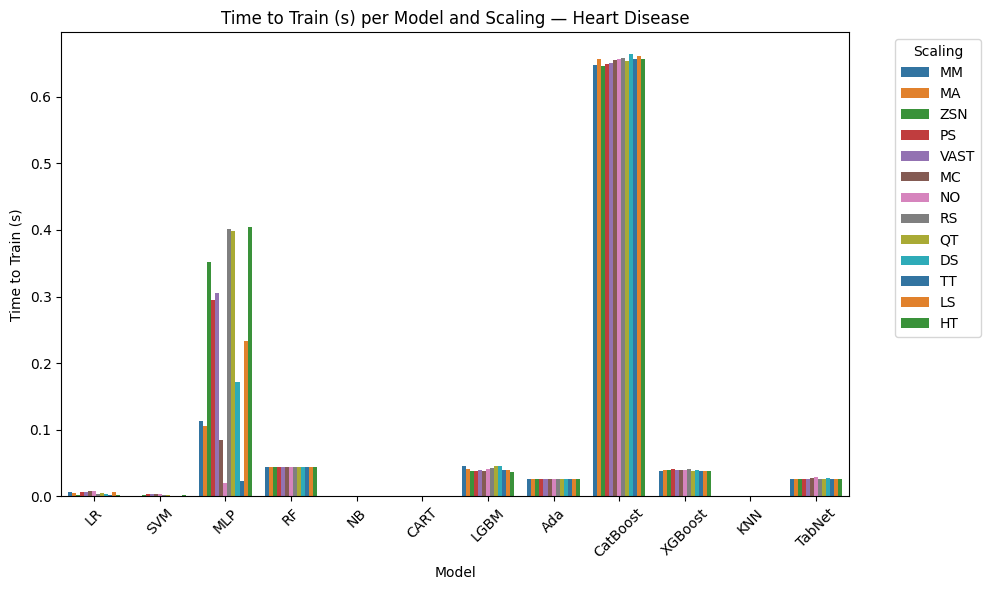

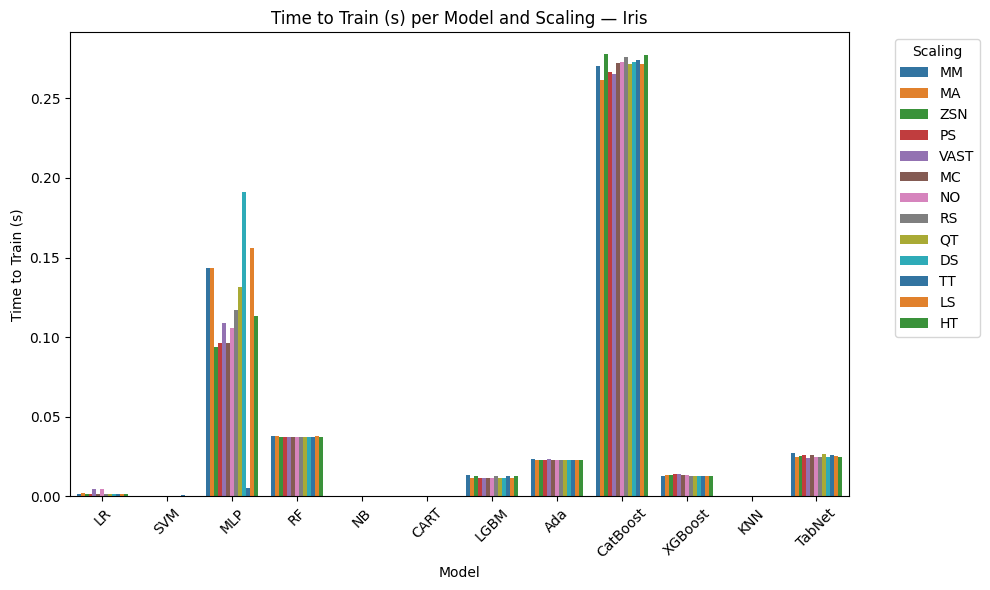

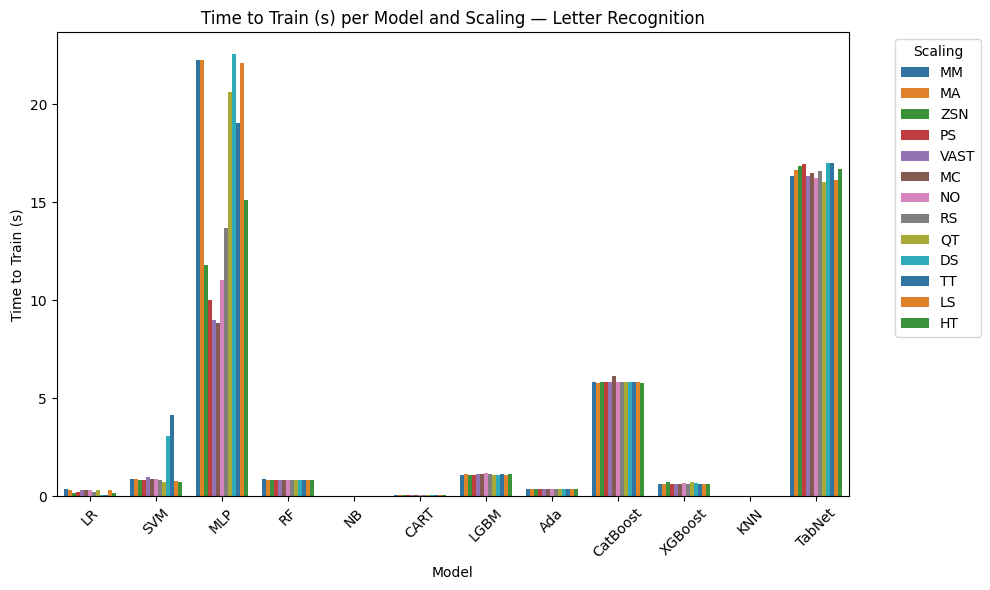

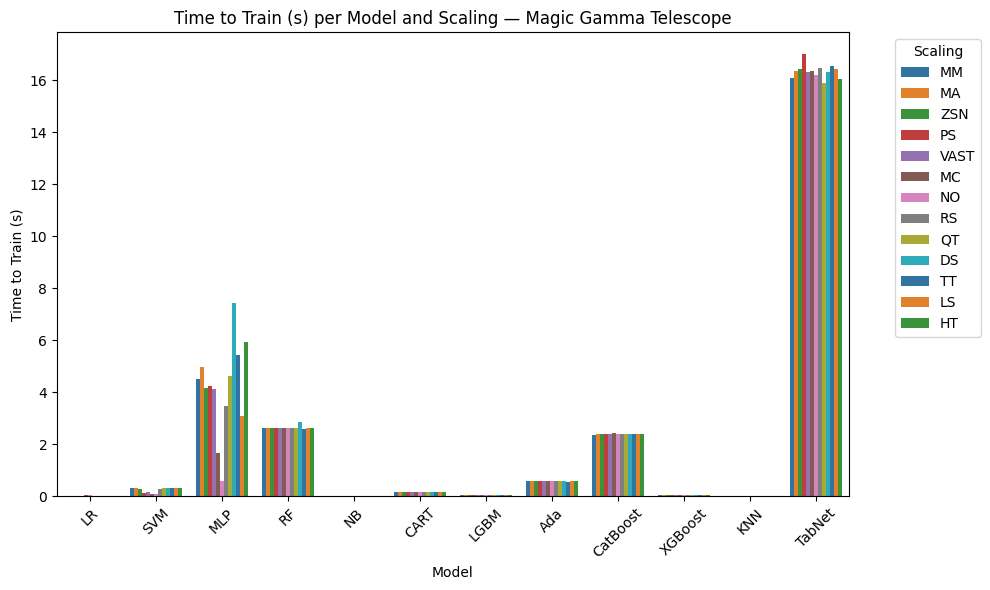

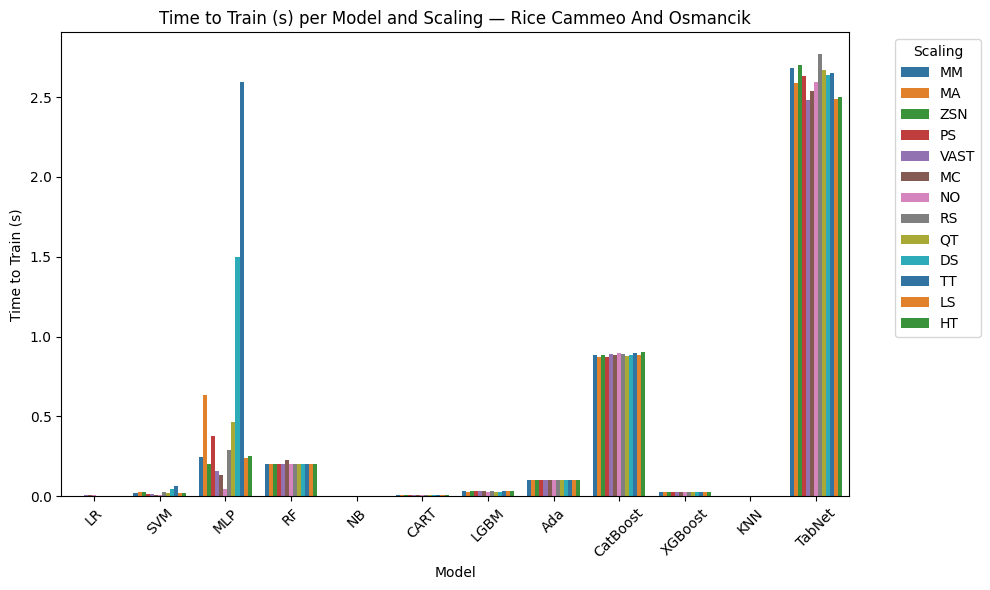

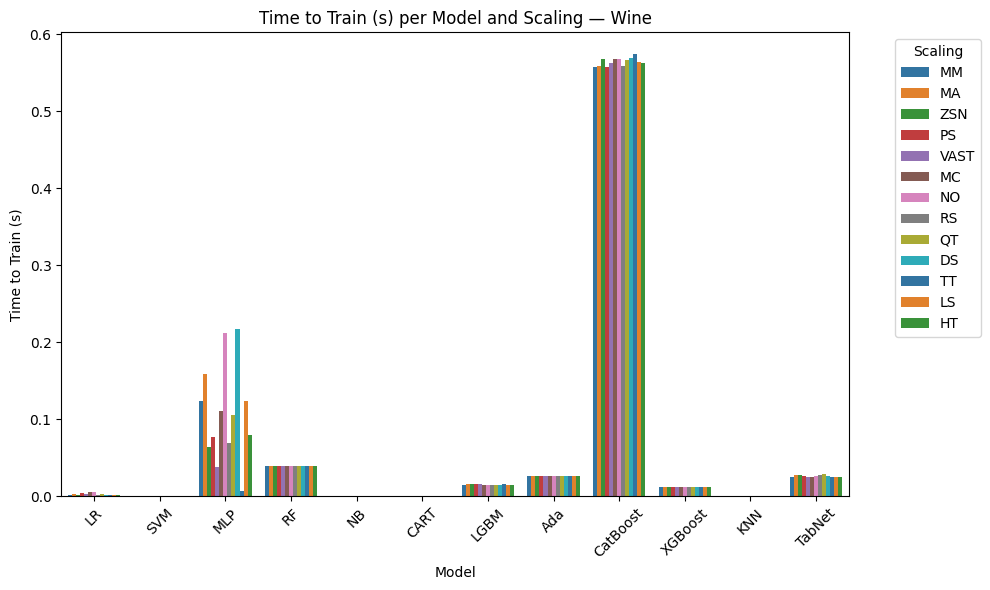

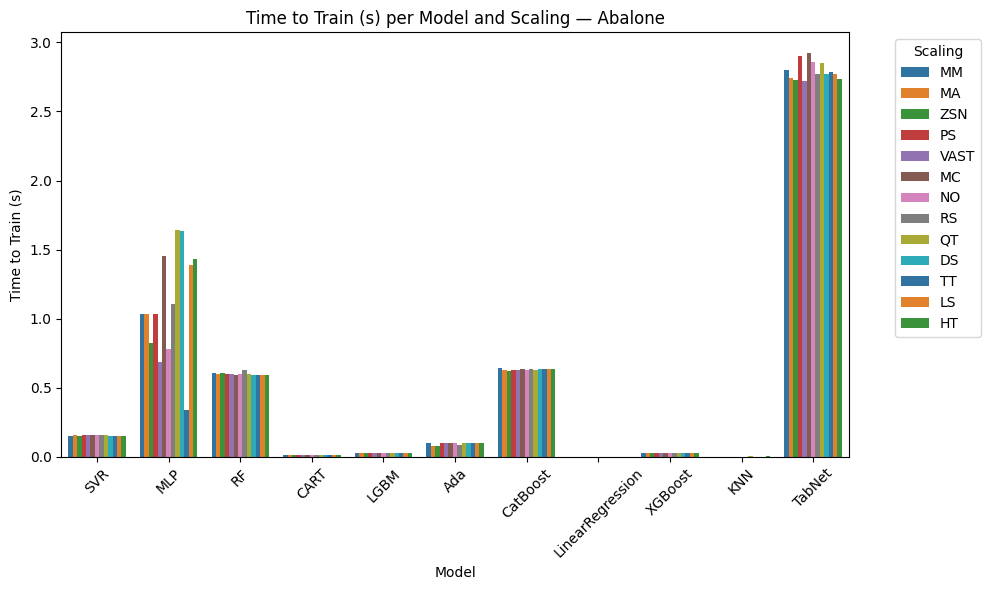

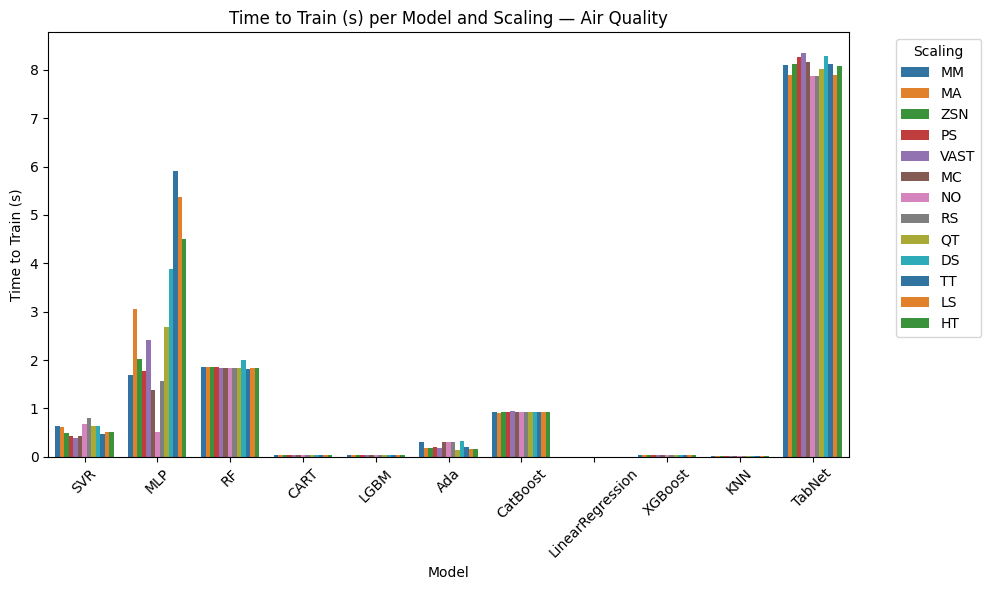

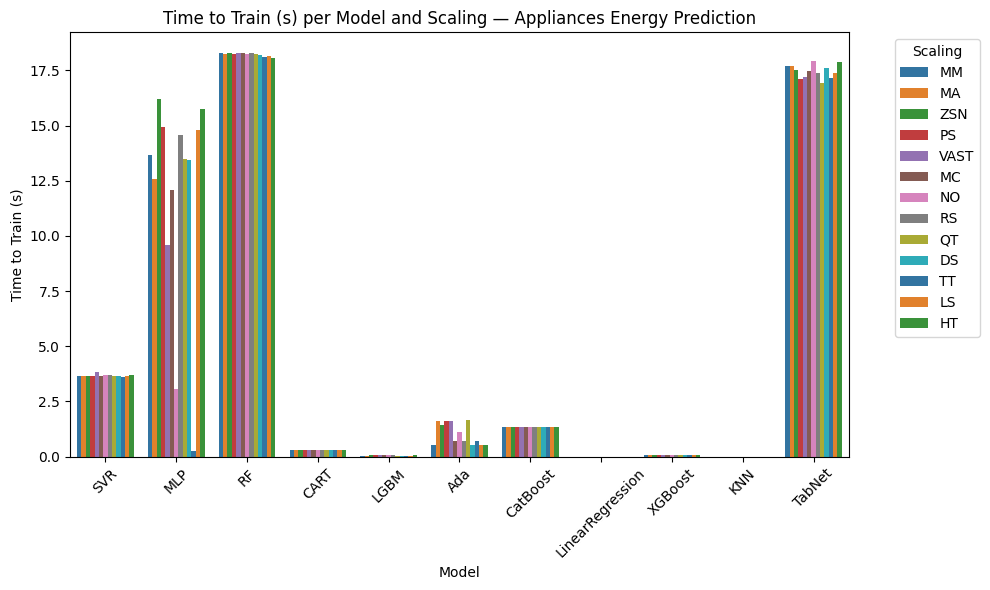

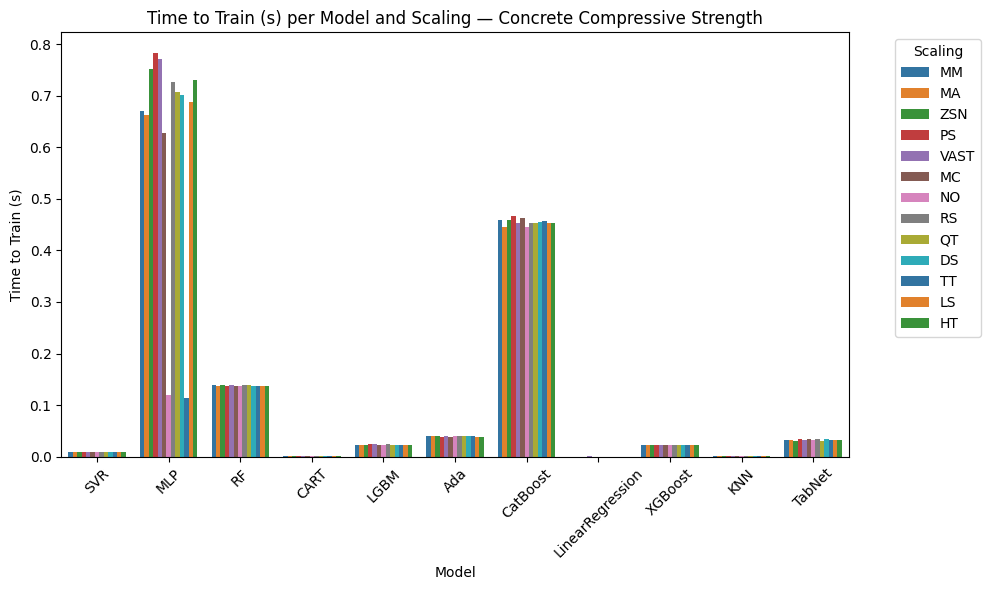

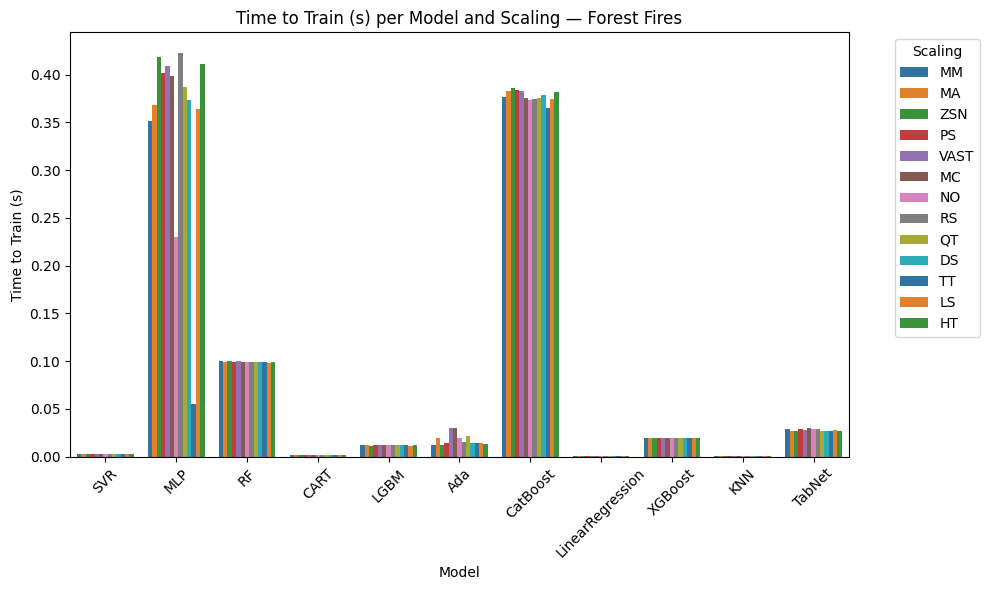

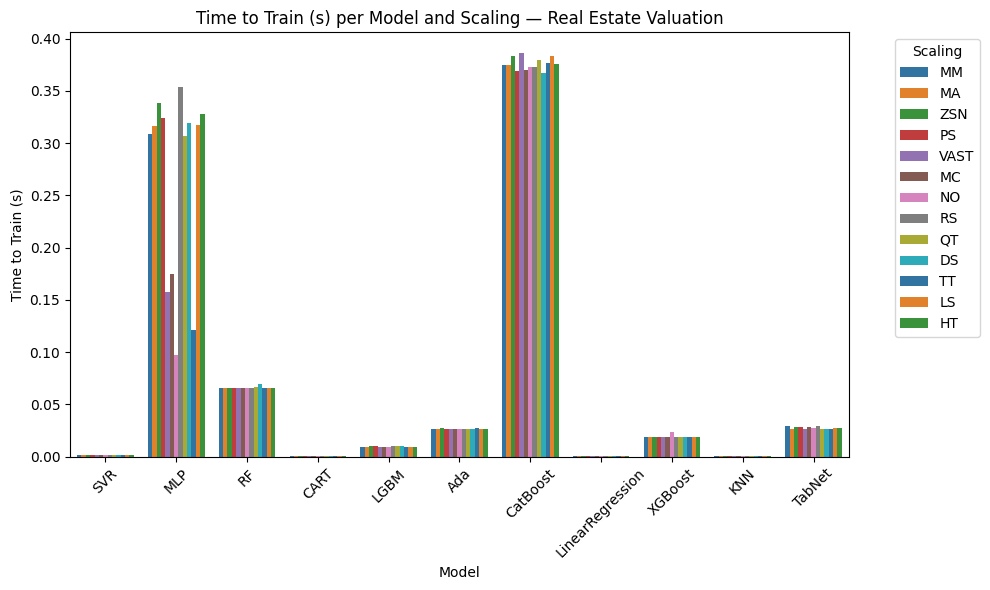

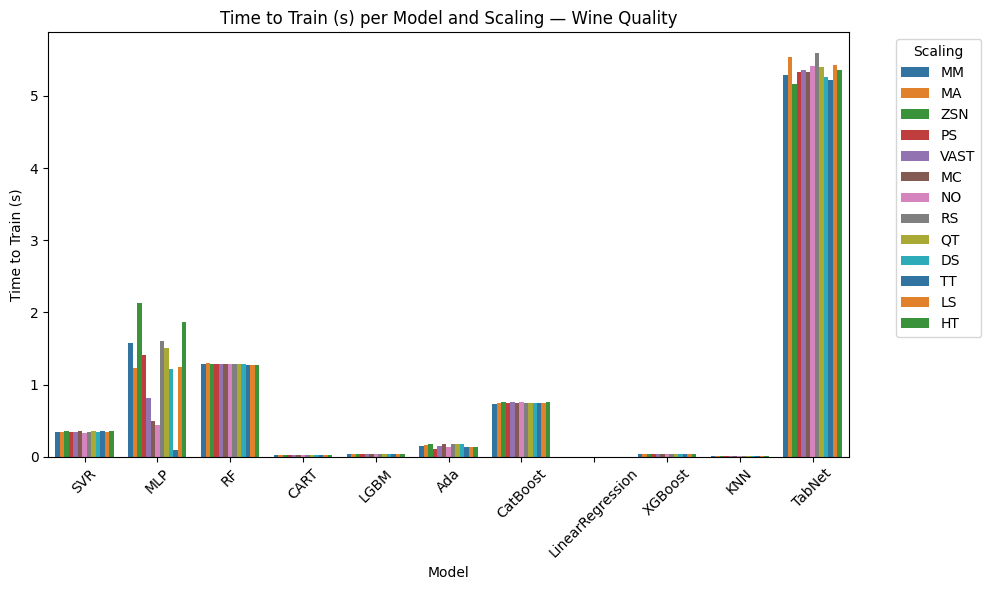

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_train_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_train'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_time_train.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['time_train'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='time_train',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Time to Train (s) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Time to Train (s)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_time_train.pdf")
    plt.show()
    plt.close()


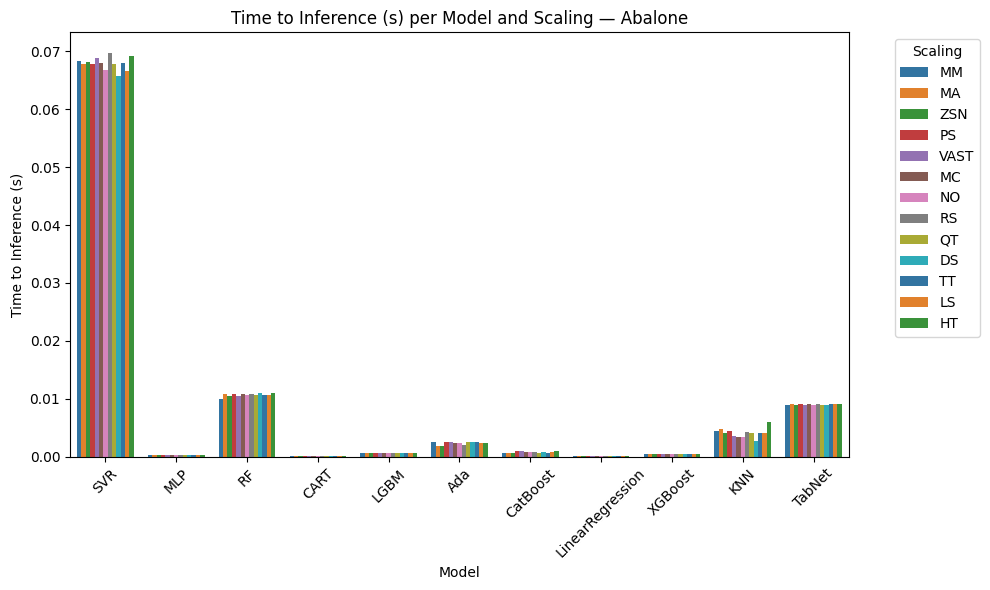

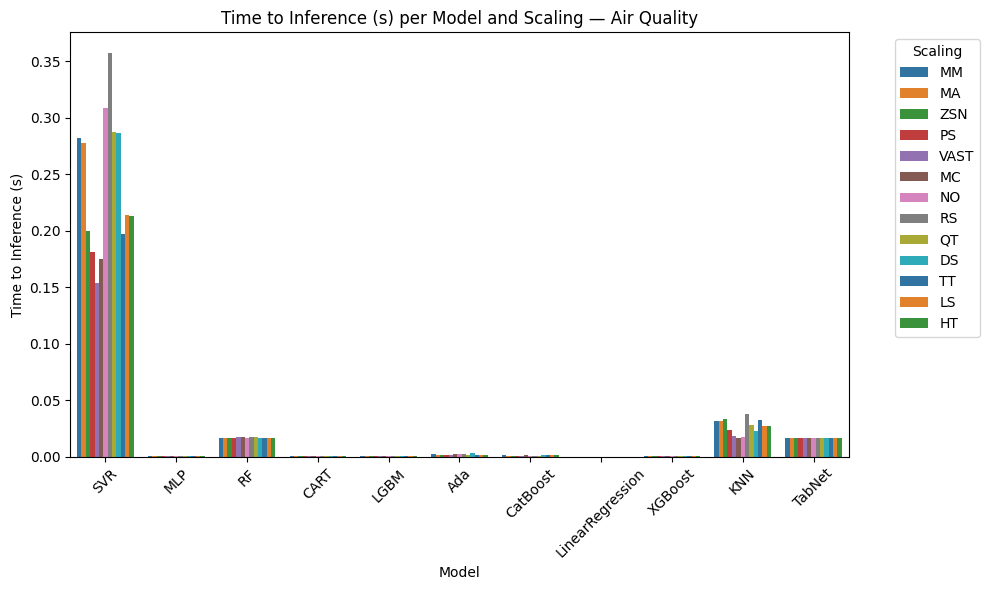

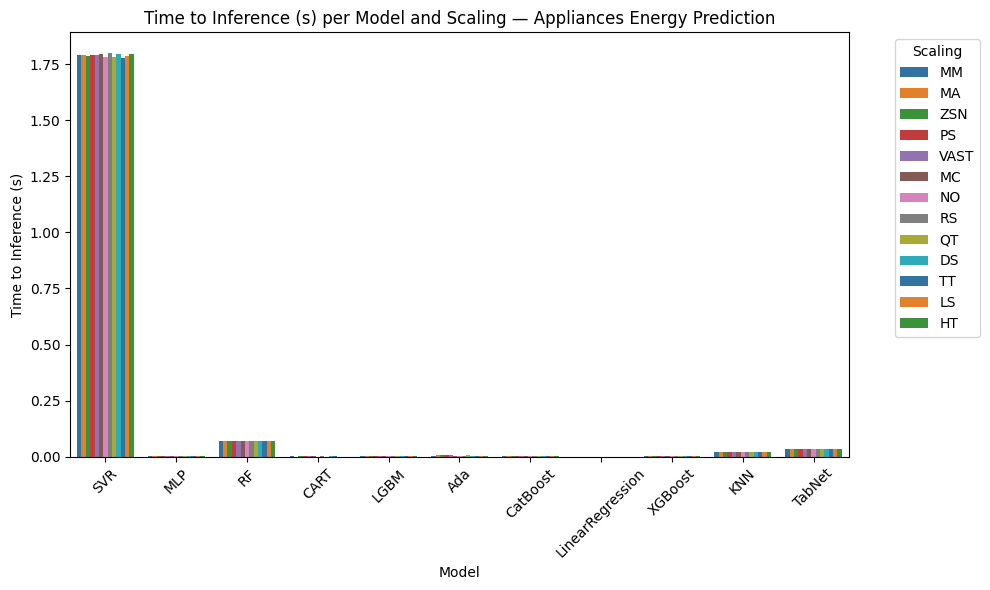

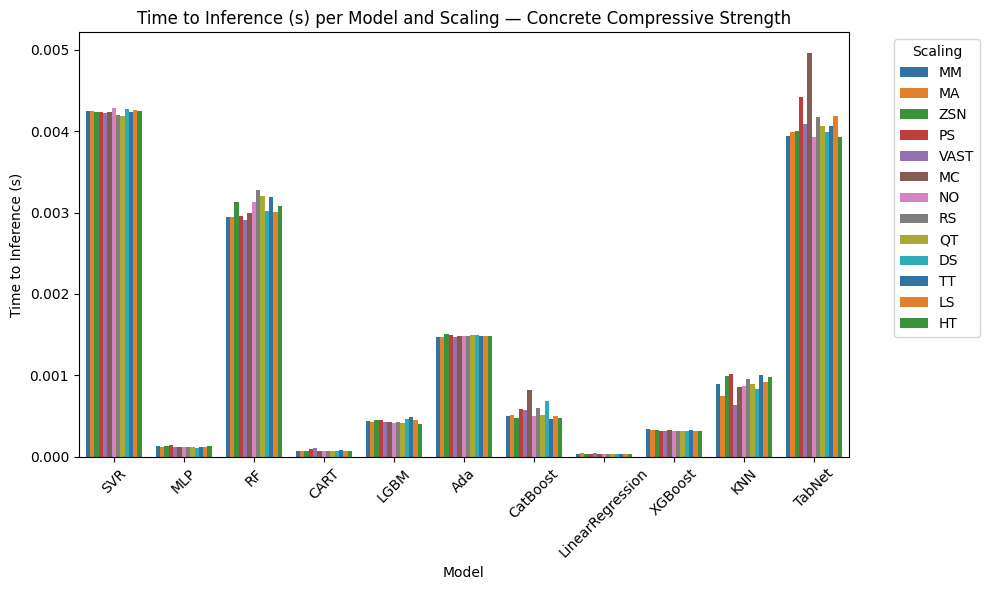

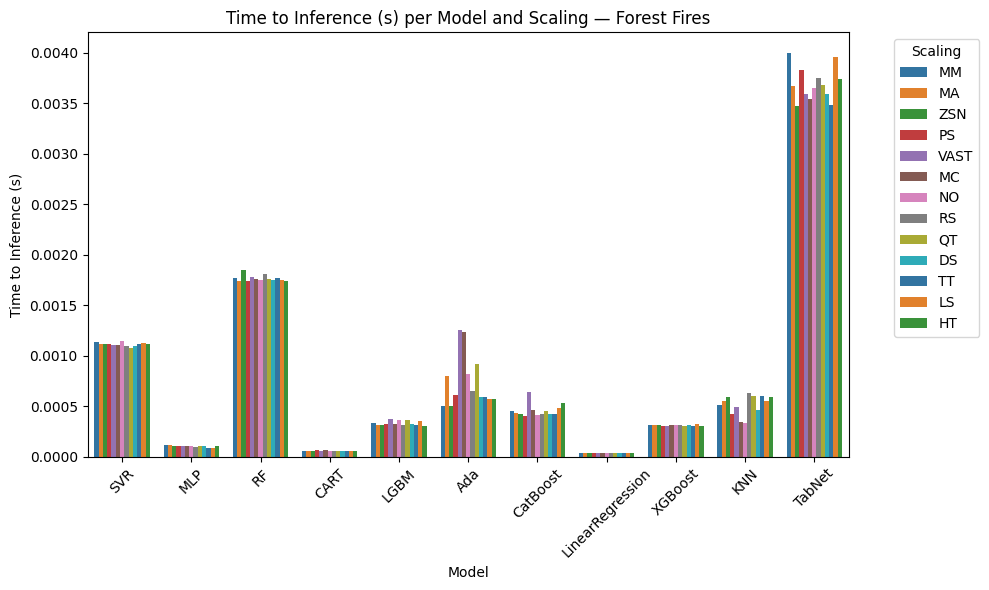

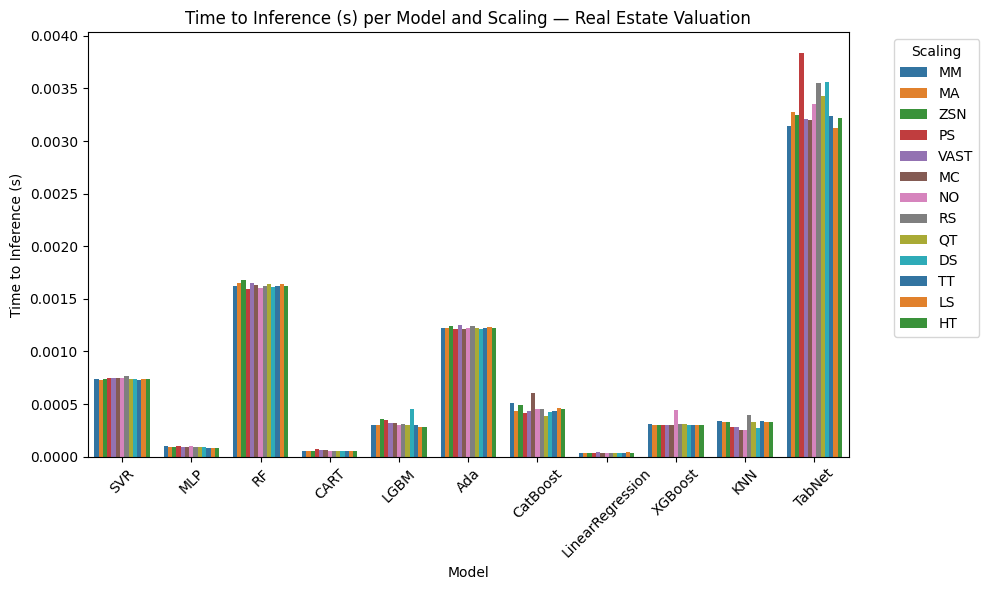

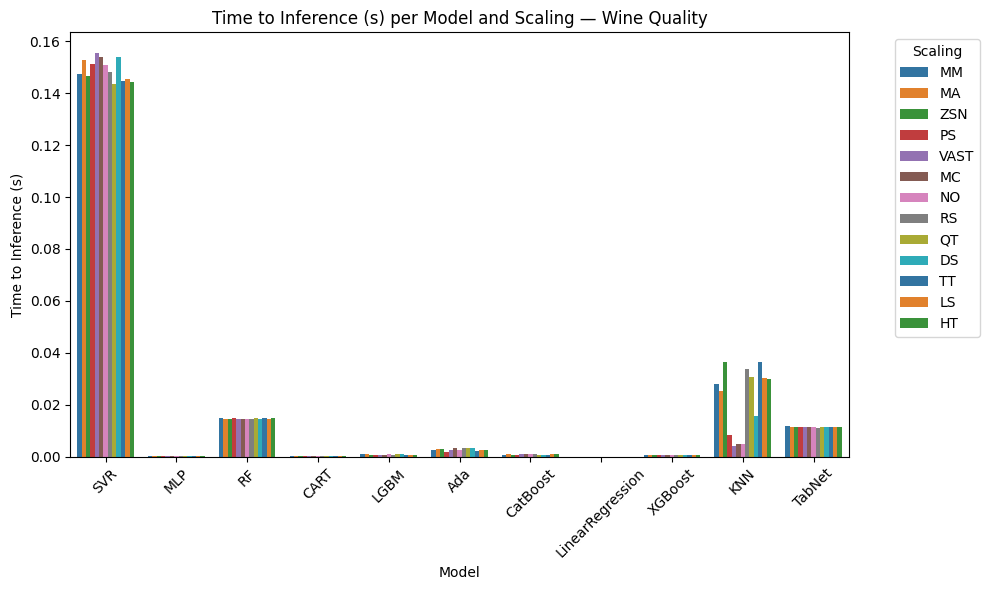

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_inference_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_inference'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_time_inference.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='time_inference',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Time to Inference (s) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Time to Inference (s)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_time_inference.pdf")
    plt.show()
    plt.close()


#### Memory Usage in regression

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- Configuration ---
# Set the metric you want to analyze. Your code used 'memory_used_kb'.
# You can easily change this to 'time_to_inference' or 'time_to_train'.
metric_to_analyze = 'memory_used_kb'
# --- End Configuration ---


# Assume df_results is a pre-existing DataFrame with all your experimental data
# It should contain 'dataset_name', 'mae', 'scaling_abbrev', and the metric_to_analyze.

# Create a clear output directory for summary tables
output_dir = "results/summary_tables_regression"
os.makedirs(output_dir, exist_ok=True)

# 1. Filter for your regression datasets by checking for the 'mae' metric
df_regr_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

# 2. Create a dictionary to hold the mean results for each dataset
mean_results_data = {}

# 3. Loop through each regression dataset to perform the aggregation
for dataset in df_regr_analysis:
    df_filtered_regr = df_results[df_results['dataset_name'] == dataset]
    
    # Group by scaling abbreviation and calculate the mean of the chosen metric
    mean_by_scaling = df_filtered_regr.groupby('scaling_abbrev')[metric_to_analyze].mean()
    
    # Add the result to our dictionary
    mean_results_data[dataset] = mean_by_scaling

# 4. Create a single, consolidated DataFrame from the collected results
final_summary_df = pd.DataFrame(mean_results_data).T

# Round the data for cleaner presentation
final_summary_df = final_summary_df.round(4)

# Optional: Sort columns alphabetically for consistency
final_summary_df = final_summary_df.reindex(sorted(final_summary_df.columns), axis=1)

# 5. Generate and save the final table visualization
# Create a title-friendly version of the metric name
metric_title = metric_to_analyze.replace('_', ' ').title()

fig, ax = plt.subplots(figsize=(14, 0.5 * len(final_summary_df) + 1.5))
ax.axis('off')
ax.set_title(
    f"Mean {metric_title} by Dataset and Scaling Method (Regression)",
    fontsize=16, weight='bold', pad=20
)

table = ax.table(
    cellText=final_summary_df.values,
    rowLabels=final_summary_df.index,
    colLabels=final_summary_df.columns,
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)

# Save the single consolidated table to a PDF with a descriptive name
output_filename = f"summary_mean_{metric_to_analyze}_regression.pdf"
output_path = os.path.join(output_dir, output_filename)
plt.savefig(output_path, bbox_inches='tight')
plt.close(fig)

In [50]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Create output directory
# output_dir = "results/tables_inference_regression"
# os.makedirs(output_dir, exist_ok=True)
# df_class_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

# def bold_max_mask(df):
#     return df.eq(df.max(axis=1), axis=0)

# for dataset in df_class_analysis:
#     df_filtered_class = df_results[df_results['dataset_name'] == dataset]
#     heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['memory_used_kb'].mean().unstack()
#     heat_df = heat_df.round(4)

#     bold_mask = bold_max_mask(heat_df)

#     fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
#     ax.axis('off')
#     # ax.set_title(
#     #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
#     #     fontsize=14, weight='bold'
#     # )

#     table = ax.table(
#         cellText=heat_df.values,
#         rowLabels=heat_df.index,
#         colLabels=heat_df.columns,
#         loc='center',
#         cellLoc='center'
#     )

#     table.auto_set_font_size(False)
#     table.set_fontsize(10)
#     table.scale(1, 1.5)

#     # Bold max values
#     for i, row in enumerate(bold_mask.values):
#         for j, is_bold in enumerate(row):
#             if is_bold:
#                 cell = table[(i + 1, j)]
#                 cell.set_fontsize(10)
#                 cell.set_text_props(weight='bold')

#     # Save one PDF per dataset
#     plt.savefig(f"{output_dir}/{dataset}_table_memory.pdf", bbox_inches='tight')
#     plt.close(fig)

# # Create output directory
# os.makedirs(output_dir, exist_ok=True)

# # List of datasets to process
# datasets = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

# for dataset in datasets:
#     df_filtered = df_results[df_results['dataset_name'] == dataset]
#     nice_title = name_mapping.get(dataset, dataset)
    
#     plt.figure(figsize=(10, 6))
#     sns.barplot(
#         data=df_filtered,
#         x='model',
#         y='memory_used_kb',
#         hue='scaling_abbrev',
#         palette='tab10'
#     )
#     plt.title(f"Memory Usage (Kb) per Model and Scaling — {nice_title}")
#     plt.ylim()
#     plt.xticks(rotation=45)
#     plt.ylabel("Memory Usage (Kb)")
#     plt.xlabel("Model")
#     plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
    
#     # Save figure
#     plt.savefig(f"{output_dir}/{dataset}_memory.pdf")
#     plt.show()
#     plt.close()


Top models frequency

In [51]:
# Step 1: Find the maximum accuracy for each model within each dataset.
# This creates a new Series where each model is represented only once per dataset with its best score.
df_filtered = df_results.loc[df_results['accuracy'].notna()]
max_accuracy_per_model = df_filtered.groupby(['dataset_name', 'model'])['accuracy'].max()

# Step 2: Now, group the above result by dataset and get the top 4 entries.
# Since each model is now unique within a dataset group, this gives us the top 4 distinct models.
top_4_distinct_models = max_accuracy_per_model.groupby('dataset_name', group_keys=False).nlargest(4)

# Display the final result
# Access the 'model' level of the index and perform a value count
model_appearance_counts = top_4_distinct_models.index.get_level_values('model').value_counts()

# Display the result
print(model_appearance_counts)

model
MLP         5
CatBoost    5
LGBM        4
LR          4
RF          4
SVM         3
XGBoost     3
Ada         2
TabNet      2
KNN         2
CART        1
NB          1
Name: count, dtype: int64


In [52]:
# Step 1: Find the maximum accuracy for each model within each dataset.
# This creates a new Series where each model is represented only once per dataset with its best score.
df_filtered = df_results.loc[df_results['mae'].notna()]
max_accuracy_per_model = df_filtered.groupby(['dataset_name', 'model'])['mse'].min()

# Step 2: Now, group the above result by dataset and get the top 4 entries.
# Since each model is now unique within a dataset group, this gives us the top 4 distinct models.
top_4_distinct_models = max_accuracy_per_model.groupby('dataset_name', group_keys=False).nsmallest(4)

# Display the final result
# Access the 'model' level of the index and perform a value count
model_appearance_counts = top_4_distinct_models.index.get_level_values('model').value_counts()

# Display the result
print(model_appearance_counts)

model
RF                  5
LGBM                5
XGBoost             5
CatBoost            4
MLP                 3
KNN                 2
TabNet              1
SVR                 1
CART                1
LinearRegression    1
Name: count, dtype: int64


In [53]:
# Step 1: Find the maximum accuracy for each model within each dataset.
# This creates a new Series where each model is represented only once per dataset with its best score.
df_filtered = df_results.loc[df_results['mae'].notna()]
max_accuracy_per_model = df_filtered.groupby(['dataset_name', 'model'])['mae'].min()

# Step 2: Now, group the above result by dataset and get the top 4 entries.
# Since each model is now unique within a dataset group, this gives us the top 4 distinct models.
top_4_distinct_models = max_accuracy_per_model.groupby('dataset_name', group_keys=False).nsmallest(4)

# Display the final result
# Access the 'model' level of the index and perform a value count
model_appearance_counts = top_4_distinct_models.index.get_level_values('model').value_counts()

# Display the result
print(model_appearance_counts)

model
RF          5
LGBM        5
XGBoost     4
CatBoost    4
MLP         3
SVR         2
TabNet      2
KNN         2
CART        1
Name: count, dtype: int64


In [54]:
# Step 1: Find the maximum accuracy for each model within each dataset.
# This creates a new Series where each model is represented only once per dataset with its best score.
df_filtered = df_results.loc[df_results['mae'].notna()]
max_accuracy_per_model = df_filtered.groupby(['dataset_name', 'model'])['r2score'].max()

# Step 2: Now, group the above result by dataset and get the top 4 entries.
# Since each model is now unique within a dataset group, this gives us the top 4 distinct models.
top_4_distinct_models = max_accuracy_per_model.groupby('dataset_name', group_keys=False).nlargest(4)

# Display the final result
# Access the 'model' level of the index and perform a value count
model_appearance_counts = top_4_distinct_models.index.get_level_values('model').value_counts()

# Display the result
print(model_appearance_counts)

model
RF                  5
LGBM                5
XGBoost             5
CatBoost            4
MLP                 3
KNN                 2
TabNet              1
SVR                 1
CART                1
LinearRegression    1
Name: count, dtype: int64


### LaTex table

In [55]:
scaling_order = [
    'NO',
    'MM',
    'MA',
    'ZSN',
    'PS',
    'VAST',
    'MC',
    'RS',
    'QT',
    'DS',
    'TT',
    'LS',
    'HT'
]

In [ ]:
#def format_multiline_latex(name):
#    if isinstance(name, str) and len(name.split()) > 2:
#        parts = " \\\\ ".join(name.split())
#        return f"\\begin{{tabular}}[t]{{@{{}}l@{{}}}}{parts}\\end{{tabular}}"
#    return name

In [92]:
def format_multiline_latex(name, max_len=13):
    if not isinstance(name, str):
        return name

    words = name.split()
    lines = []
    current_line = ""

    for word in words:
        if len(current_line + " " + word) <= max_len:
            current_line = (current_line + " " + word).strip()
        else:
            lines.append(current_line)
            current_line = word
    lines.append(current_line)  # adiciona a última linha

    if len(" ".join(words)) > max_len:
        latex_lines = " \\\\ ".join(lines)  # separa fora do f-string
        return f"\\begin{{tabular}}[t]{{@{{}}l@{{}}}}{latex_lines}\\end{{tabular}}"
    else:
        return name

In [93]:
import pandas as pd

# Apply dataset name mapping
df_latex = df_results.copy()
df_latex['dataset_name'] = df_latex['dataset_name'].map(name_mapping)
ordered_datasets = df_latex['dataset_name'].drop_duplicates().tolist()
df_latex['dataset_name'] = df_latex['dataset_name'].apply(format_multiline_latex)
df_latex['dataset_name'] = pd.Categorical(
    df_latex['dataset_name'],
    categories=[format_multiline_latex(name) for name in ordered_datasets],
    ordered=True
)

# Rename columns
df_latex = df_latex.rename(columns={
    'dataset_name': 'dataset',
    'scaling_abbrev': 'scaling'
})

# Filter out rows with missing accuracy
df_filtered = df_latex.dropna(subset=['accuracy'])

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='accuracy',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Accuracy per Dataset, Model, and Scaling Method",
    label="tab:accuracy_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} % Reduz o espaço entre as colunas\n"
    + latex_longtable_string +
    "}"
)
print(final_latex_code)

{\footnotesize
\setlength{\tabcolsep}{3pt} % Reduz o espaço entre as colunas
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{Accuracy per Dataset, Model, and Scaling Method} \label{tab:accuracy_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{Accuracy per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{12}{*}{\begin{tabular}[t]{@{}l@{}}Breast Cancer \\ Wisconsin \\ Diagnostic\end{tabular}} & Ada & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 & 0.9766 \\
 & CART & 0.9415 & 0.9415 & 0.9415 & 0.9415 & 0.9415 & 0.9415 & 0.9

C:\Users\User\AppData\Local\Temp\ipykernel_27972\1386699008.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


In [ ]:

df_filtered = df_latex.dropna(subset=['accuracy'])

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='time_train',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Time to Train (s) per Dataset, Model, and Scaling Method",
    label="tab:train_class_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{2pt} \n"
    + latex_longtable_string +
    "}"
)

print(final_latex_code)


{\footnotesize
\setlength{\tabcolsep}{2pt} 
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{Time to train (s) per Dataset, Model, and Scaling Method} \label{tab:train_class_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{Time to train (s) per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{12}{*}{\begin{tabular}[t]{@{}l@{}}Breast Cancer \\ Wisconsin \\ Diagnostic\end{tabular}} & Ada & 0.0610 & 0.0631 & 0.0614 & 0.0614 & 0.0612 & 0.0613 & 0.0611 & 0.0614 & 0.0616 & 0.0611 & 0.0611 & 0.0612 & 0.0612 \\
 & CART & 0.0035 & 0.0036 & 0.0035 & 0.0035 & 0.0035 & 0.0035 & 0.0035 & 0.0035

C:\Users\User\AppData\Local\Temp\ipykernel_27972\2888807107.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


In [ ]:

df_filtered = df_latex.dropna(subset=['accuracy'])

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='time_inference',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Time to Inference (s) per Dataset, Model, and Scaling Method",
    label="tab:inf_class_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} \n"
    + latex_longtable_string +
    "}"
)

print(final_latex_code)


{\footnotesize
\setlength{\tabcolsep}{3pt} 
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{Time to inference (s) per Dataset, Model, and Scaling Method} \label{tab:inf_class_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{Time to inference (s) per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{12}{*}{\begin{tabular}[t]{@{}l@{}}Breast Cancer \\ Wisconsin \\ Diagnostic\end{tabular}} & Ada & 0.0018 & 0.0018 & 0.0018 & 0.0018 & 0.0017 & 0.0018 & 0.0017 & 0.0017 & 0.0018 & 0.0018 & 0.0017 & 0.0017 & 0.0017 \\
 & CART & 0.0001 & 0.0001 & 0.0001 & 0.0001 & 0.0001 & 0.0001 & 0.0001 & 

C:\Users\User\AppData\Local\Temp\ipykernel_27972\3013093330.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


R2 score

In [97]:
import pandas as pd

# Apply dataset name mapping
df_latex = df_results.copy()
df_latex['dataset_name'] = df_latex['dataset_name'].map(name_mapping)
ordered_datasets = df_latex['dataset_name'].drop_duplicates().tolist()
df_latex['dataset_name'] = df_latex['dataset_name'].apply(format_multiline_latex)
df_latex['dataset_name'] = pd.Categorical(
    df_latex['dataset_name'],
    categories=[format_multiline_latex(name) for name in ordered_datasets],
    ordered=True
)
# Rename columns
df_latex = df_latex.rename(columns={
    'dataset_name': 'dataset',
    'scaling_abbrev': 'scaling'
})

# Filter out rows with missing accuracy
df_filtered = df_latex.dropna(subset=['mse'])

pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='r2score',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="$R^2$ Score per Dataset, Model, and Scaling Method",
    label="tab:r2_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} % Reduz o espaço entre as colunas\n"
    + latex_longtable_string +
    "}"
)

print(final_latex_code)

{\footnotesize
\setlength{\tabcolsep}{3pt} % Reduz o espaço entre as colunas
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{$R^2$ Score per Dataset, Model, and Scaling Method} \label{tab:r2_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{$R^2$ Score per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{11}{*}{Abalone} & Ada & 0.1671 & 0.2210 & 0.2243 & 0.2503 & 0.1510 & 0.1938 & 0.1296 & 0.2301 & 0.1347 & 0.2018 & 0.1690 & 0.2112 & 0.2112 \\
 & CART & 0.1383 & 0.1464 & 0.1477 & 0.1560 & 0.1456 & 0.1500 & 0.1626 & 0.1417 & 0.1663 & 0.1416 & 0.1373 & 0.1686 & 0.1686 \\
 & CatBoost 

C:\Users\User\AppData\Local\Temp\ipykernel_27972\2824994164.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


MSE

In [106]:
pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='mse',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="MSE per Dataset, Model, and Scaling Method",
    label="tab:mse_big_table"
)


final_latex_code = (
    "\\begin{landscape}\n"
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} % Reduz o espaço entre as colunas\n"
    + latex_longtable_string +
    "}\n"
    "\\end{landscape}"
    
)

print(final_latex_code)

\begin{landscape}
{\footnotesize
\setlength{\tabcolsep}{3pt} % Reduz o espaço entre as colunas
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{MSE per Dataset, Model, and Scaling Method} \label{tab:mse_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{MSE per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{11}{*}{Abalone} & Ada & 8.4579 & 7.9106 & 7.8773 & 7.6131 & 8.6210 & 8.1869 & 8.8383 & 7.8177 & 8.7869 & 8.1054 & 8.4388 & 8.0102 & 8.0102 \\
 & CART & 8.7504 & 8.6683 & 8.6547 & 8.5702 & 8.6762 & 8.6316 & 8.5032 & 8.7161 & 8.4657 & 8.7169 & 8.7600 & 8.4426 & 8.4426 \\
 & CatBoo

C:\Users\User\AppData\Local\Temp\ipykernel_27972\2286032351.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


MAE

In [105]:
pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='mae',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="MAE per Dataset, Model, and Scaling Method",
    label="tab:mae_big_table"
)


final_latex_code = (
    "\\begin{landscape}\n"
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} % Reduz o espaço entre as colunas\n"
    + latex_longtable_string +
    "}\n"
    "\\end{landscape}"
)

print(final_latex_code)

\begin{landscape}
{\footnotesize
\setlength{\tabcolsep}{3pt} % Reduz o espaço entre as colunas
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{MAE per Dataset, Model, and Scaling Method} \label{tab:mae_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{MAE per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{11}{*}{Abalone} & Ada & 2.5042 & 2.4037 & 2.3991 & 2.3437 & 2.5275 & 2.4467 & 2.5691 & 2.3881 & 2.5624 & 2.4383 & 2.4968 & 2.4173 & 2.4173 \\
 & CART & 2.0805 & 2.0702 & 2.0710 & 2.0582 & 2.0766 & 2.0702 & 2.0582 & 2.0718 & 2.0542 & 2.0789 & 2.0821 & 2.0502 & 2.0502 \\
 & CatBoo

C:\Users\User\AppData\Local\Temp\ipykernel_27972\2113543462.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


Train

In [ ]:
pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='time_train',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Time to Train (s) per Dataset, Model, and Scaling Method",
    label="tab:train_reg_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} % Reduz o espaço entre as colunas\n"
    + latex_longtable_string +
    "}"
)

print(final_latex_code)

{\footnotesize
\setlength{\tabcolsep}{3pt} % Reduz o espaço entre as colunas
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{Time to Train per Dataset, Model, and Scaling Method} \label{tab:train_reg_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{Time to Train per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{11}{*}{Abalone} & Ada & 0.0962 & 0.0972 & 0.0765 & 0.0755 & 0.0982 & 0.0959 & 0.0962 & 0.0810 & 0.0965 & 0.0973 & 0.0968 & 0.0969 & 0.0960 \\
 & CART & 0.0093 & 0.0093 & 0.0093 & 0.0093 & 0.0094 & 0.0094 & 0.0094 & 0.0093 & 0.0093 & 0.0093 & 0.0093 & 0.0093 & 0.0093 \\
 

C:\Users\User\AppData\Local\Temp\ipykernel_27972\3326997542.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


Inference

In [101]:
pivot_table = df_filtered.pivot_table(
    index=['dataset', 'model'],    
    columns='scaling',             
    values='time_inference',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Time to Inference (s) per Dataset, Model, and Scaling Method",
    label="tab:inf_reg_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{3pt} % Reduz o espaço entre as colunas\n"
    + latex_longtable_string +
    "}"
)

print(final_latex_code)

{\footnotesize
\setlength{\tabcolsep}{3pt} % Reduz o espaço entre as colunas
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{Time to Inference (s) per Dataset, Model, and Scaling Method} \label{tab:inf_reg_big_table} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{Time to Inference (s) per Dataset, Model, and Scaling Method} \\
\toprule
 & scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset & model &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{15}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{11}{*}{Abalone} & Ada & 0.0024 & 0.0025 & 0.0019 & 0.0019 & 0.0025 & 0.0025 & 0.0024 & 0.0020 & 0.0025 & 0.0025 & 0.0025 & 0.0024 & 0.0024 \\
 & CART & 0.0002 & 0.0001 & 0.0002 & 0.0001 & 0.0002 & 0.0002 & 0.0002 & 0.0001 & 0.0001 & 0.0001 & 0.0001 & 0.0001

C:\Users\User\AppData\Local\Temp\ipykernel_27972\2126353238.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


Memory Usage

In [102]:
df_latex

,accuracy,model,time_train,time_inference,scaling_name,dataset,memory_used_kb,r2score,mae,mse,scaling
0,0.964912,LR,0.001752,0.000075,MinMaxScaler,\begin{tabular}[t]{@{}l@{}}Breast Cancer \\ Wi...,177.890625,NaN,NaN,NaN,MM
1,0.918462,LR,0.118491,0.000251,MinMaxScaler,Dry Bean,2388.852539,NaN,NaN,NaN,MM
2,0.523077,LR,0.003209,0.000072,MinMaxScaler,\begin{tabular}[t]{@{}l@{}}Glass \\ Identifica...,23.257812,NaN,NaN,NaN,MM
3,0.582418,LR,0.005926,0.000073,MinMaxScaler,Heart Disease,49.250977,NaN,NaN,NaN,MM
4,0.911111,LR,0.001642,0.000071,MinMaxScaler,Iris,8.679688,NaN,NaN,NaN,MM
...,...,...,...,...,...,...,...,...,...,...,...
2400,NaN,TabNet,17.879798,0.033989,HyperbolicTangentTransformer,\begin{tabular}[t]{@{}l@{}}Appliances \\ Energ...,5978.063477,0.319501,44.782123,7010.922753,HT
2401,NaN,TabNet,0.031439,0.003924,HyperbolicTangentTransformer,\begin{tabular}[t]{@{}l@{}}Concrete \\ Compres...,113.659180,-4.464662,34.666597,1478.596808,HT
2402,NaN,TabNet,0.027345,0.003742,HyperbolicTangentTransformer,Forest Fires,75.199219,-0.027246,14.993880,8174.744970,HT
2403,NaN,TabNet,0.027609,0.003218,HyperbolicTangentTransformer,\begin{tabular}[t]{@{}l@{}}Real Estate \\ Valu...,43.959961,-8.286716,37.158927,1552.972170,HT


In [103]:
df_filtered = df_latex
pivot_table = df_filtered.pivot_table(
    index=['dataset'],    
    columns='scaling',             
    values='memory_used_kb',
    aggfunc='mean'
)
pivot_table = pivot_table.reindex(columns=scaling_order)

latex_longtable_string = pivot_table.to_latex(
    longtable=True,
    column_format="llrrrrrrrrrrrrr",
    float_format="%.4f",
    na_rep="-",
    multicolumn=True,
    multirow=True,
    index=True,
    caption="Memory Usage (kB) per Dataset and Scaling Method",
    label="tab:memory_big_table"
)


final_latex_code = (
    "{\\footnotesize\n"
    "\\setlength{\\tabcolsep}{2pt} \n"
    + latex_longtable_string +
    "}"
)

print(final_latex_code)


{\footnotesize
\setlength{\tabcolsep}{2pt} 
\begin{longtable}{llrrrrrrrrrrrrr}
\caption{Memory Usage (kB) per Dataset and Scaling Method} \label{tab:memory_big_table} \\
\toprule
scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endfirsthead
\caption[]{Memory Usage (kB) per Dataset and Scaling Method} \\
\toprule
scaling & NO & MM & MA & ZSN & PS & VAST & MC & RS & QT & DS & TT & LS & HT \\
dataset &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\endhead
\midrule
\multicolumn{14}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\begin{tabular}[t]{@{}l@{}}Breast Cancer \\ Wisconsin \\ Diagnostic\end{tabular} & 0.1875 & 176.7441 & 175.7480 & 176.2767 & 230.1009 & 229.6383 & 227.5553 & 384.9574 & 267.6452 & 230.3509 & 231.0911 & 231.1121 & 231.4199 \\
Dry Bean & 1704.2923 & 2388.0667 & 2448.4147 & 2599.3548 & 2406.3291 & 2404.5013 & 2404.4173 & 2388.2643 & 2520.4935 & 2405.5

C:\Users\User\AppData\Local\Temp\ipykernel_27972\901478864.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(
